NAME: Harsha Joshi <BR>
STUDENT ID: 45561623 <BR>
DATA2001 A3

# Question 1
**Data Preparation: <br>
a. Compile all the data for the period 2011-2023 into one series using the “pandas” library and set up an index for the entire dataset in an appropriate way for timeseries analysis. <br>
b. The RBA interest rate data has a different resolution to the unemployment and inflation data. Explain and briefly justify the adjust to the resolution of the RBA data that you use.**

In [1]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd

In [3]:
# Download the data and load each data point into separate dataframes.
unemployment_raw = pd.read_excel('data-copy-original/6202006.xlsx', 'Data1', header=9)
inflation_raw = pd.read_excel('data-copy-original/640101.xlsx', 'Data1', header=9)
interest_raw = pd.read_excel('data-copy-original/f01d.xlsx', 'Data', header=10)

**OBSERVATION**<br>
It is to be noted that the raw data contains headers of size 9 or 10, which are removed respectively so that the relevant data is for timeseries is displayed.

In [4]:
# See the first few rows of each dataset to have an overall view
unemployment_raw.head()

,Series ID,A84423951K,A84423279X,A84423615X,A84423839K,A84423167F,A84423503F,A84424063F,A84423391X,A84423727T,...,A84423509V,A84424069V,A84423397L,A84423733L,A84423618F,A84423506L,A84423730F,A84423619J,A84423507R,A84423731J
0,1978-02-01,872.739185,870.895285,861.663306,573.248160,571.837259,567.876151,299.491025,299.058025,293.787155,...,79.228578,41.639330,41.761431,41.771474,618.204656,160.682734,457.521922,1559.311018,773.575997,785.735021
1,1978-03-01,872.315550,874.149555,874.319527,573.123573,575.049326,576.141423,299.191977,299.100229,298.178103,...,79.525332,41.432888,41.808547,42.151919,614.554666,158.806646,455.748020,1563.461016,775.624998,787.836018
2,1978-04-01,872.079808,875.065277,876.236820,573.026066,574.147130,575.436605,299.053742,300.918147,300.800215,...,79.143814,41.260438,41.316629,41.496263,623.848313,162.067783,461.780530,1566.390981,777.072981,789.318000
3,1978-05-01,871.902138,872.343607,872.042142,572.979281,572.687820,574.409086,298.922857,299.655786,297.633056,...,78.871005,41.107366,41.231713,41.035466,630.900166,164.524927,466.375240,1569.610913,778.668956,790.941956
4,1978-06-01,872.078675,869.331467,867.478795,573.122361,572.475841,572.119162,298.956314,296.855627,295.359633,...,78.533846,41.004681,40.692737,40.511423,639.069948,167.531963,471.537985,1573.100036,780.447038,792.652997


In [5]:
inflation_raw.head()

,Series ID,A2325806K,A2325811C,A2325816R,A2325821J,A2325826V,A2325831L,A2325836X,A2325841T,A2325846C,...,A2325847F,A2325810A,A2325815L,A2325820F,A2325825T,A2325830K,A2325835W,A2325840R,A2325845A,A2325850V
0,1948-09-01,3.7,3.8,3.7,3.8,3.7,3.8,NaN,3.9,3.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1948-12-01,3.7,3.8,3.7,3.9,3.8,3.9,NaN,4.1,3.8,...,NaN,0.0,0.0,0.0,2.6,2.7,2.6,NaN,5.1,2.7
2,1949-03-01,3.9,3.9,3.8,4.0,3.9,4.0,NaN,4.1,3.9,...,NaN,5.4,2.6,2.7,2.6,2.6,2.6,NaN,0.0,2.6
3,1949-06-01,3.9,4.0,3.9,4.0,4.0,4.1,NaN,4.2,4.0,...,NaN,0.0,2.6,2.6,0.0,2.6,2.5,NaN,2.4,2.6
4,1949-09-01,4.0,4.1,4.0,4.1,4.1,4.1,NaN,4.3,4.1,...,10.8,2.6,2.5,2.6,2.5,2.5,0.0,NaN,2.4,2.5


In [6]:
interest_raw.head()

,Series ID,FIRMMCRTD,FIRMMCCRT,FIRMMCRID,FIRMMCRIH,FIRMMCRIL,FIRMMCRIV,FIRMMCRIN,FIRMMCTRI,FIRMMBAB30D,FIRMMBAB90D,FIRMMBAB180D,FIRMMOIS1D,FIRMMOIS3D,FIRMMOIS6D,FIRMMTN1D,FIRMMTN3D,FIRMMTN6D
0,2011-01-04,4.75,NaN,4.75,NaN,NaN,NaN,NaN,100.000000,4.825,4.970,5.140,4.7530,4.7930,4.8600,4.805,4.840,NaN
1,2011-01-05,4.75,NaN,4.75,NaN,NaN,NaN,NaN,100.013014,4.830,4.985,5.140,4.7600,4.7875,4.8500,4.805,4.835,NaN
2,2011-01-06,4.75,NaN,4.75,NaN,NaN,NaN,NaN,100.026029,4.830,4.980,5.150,4.7600,4.7865,4.8500,4.800,4.830,NaN
3,2011-01-07,4.75,NaN,4.75,NaN,NaN,NaN,NaN,100.039046,4.830,5.010,5.150,4.7600,4.7900,4.8600,4.805,4.830,NaN
4,2011-01-10,4.75,NaN,4.75,NaN,NaN,NaN,NaN,100.078103,4.830,5.000,5.145,4.7565,4.7840,4.8465,4.805,NaN,NaN


**STEP 1:** <BR>
 *From all given 3 datasets, filter out the columns containing the 'Date' and columns referring to the specified serial numbers which track unemployment, inflation and interest as provided from the A3 spec sheet.*

 *In this case, it is to be noted that 'Series ID' contains the date for all 3 datasets.*

**STEP 2:** <BR>
 *Insert the two extracted columns for each dataset into a new dataframe. Store this information as a variable name. This will allow for clarity in what each dataframe is tracking before combining this in future steps to get the overall timeseries for these three datasets.*
 
 *It is to be noted that the fact that 'Series ID' still contains the date at this point.*

In [7]:
unemployment_time = unemployment_raw['Series ID']  # Refers to the Date 
unemployment_data = unemployment_raw['A84423620T']  # Unemployment's Series ID specified on A3 spec sheet
inflation_time = inflation_raw['Series ID']  # Refers to the Date
inflation_data = inflation_raw['A2325846C']  # Inflation's Series ID specified on A3 spec sheet
interest_time = interest_raw['Series ID']  # Refers to the Date
interest_data = interest_raw['FIRMMCRTD']  # Interest's Series ID specified on A3 spec sheet

# Create a new DataFrame from the two extracted columns
unemployment_df = pd.DataFrame({
    'Series ID': unemployment_time,
    'A84423620T': unemployment_data
})

inflation_df = pd.DataFrame({
    'Series ID': inflation_time,
    'A2325846C': inflation_data
})

interest_df = pd.DataFrame({
    'Series ID': interest_time,
    'FIRMMCRTD': interest_data
})

**STEP 3:** <BR>
 *Using the 3 dataframes, rename 'Series ID' column name to 'Date' for each of them, so that it relevantly demonstrates the data values contained within it.*

In [8]:
unemployment_df.rename(
    columns={
        'Series ID': 'Date',
        'A84423620T': 'Unemployment Rate'
    },
    inplace=True
)

inflation_df.rename(
    columns={
        'Series ID': 'Date',
        'A2325846C': 'Inflation Rate'
    },
    inplace=True
)

interest_df.rename(
    columns={
        'Series ID': 'Date',
        'FIRMMCRTD': 'Interest Rate'
    },
    inplace=True
)

**STEP 4:** <BR>
 *Now that the date column has been renamed, start and end dates can be specified in 'YYYY-MM-DD' format. This is because the raw data for unemployment, inflation and interest contains the Date in this format. Please refer to the 'Series ID' column values displayed, after the dataset has been loaded.*

 *Secondly, a new dataframe stores this filtered information so as to not be confused with the original dataframe for each dataset.*

In [9]:
interest_df.head()

,Date,Interest Rate
0,2011-01-04,4.75
1,2011-01-05,4.75
2,2011-01-06,4.75
3,2011-01-07,4.75
4,2011-01-10,4.75


In [10]:
# Convert 'Date' columns to datetime format
unemployment_df['Date'] = pd.to_datetime(unemployment_df['Date'])
inflation_df['Date'] = pd.to_datetime(inflation_df['Date'])
interest_df['Date'] = pd.to_datetime(interest_df['Date'])

In [11]:
# Define the start and end dates
start_date = '2011-01-01'
end_date = '2023-12-31'

# Filter for rows where the date is between start_date and end_date
filtered_unemployment_df = unemployment_df[(unemployment_df['Date'] >= start_date) & (unemployment_df['Date'] <= end_date)]
filtered_inflation_df = inflation_df[(inflation_df['Date'] >= start_date) & (inflation_df['Date'] <= end_date)]
filtered_interest_df = interest_df[(interest_df['Date'] >= start_date) & (interest_df['Date'] <= end_date)]

In [12]:
# See the first few rows of each filtered dataset to have an overall view
filtered_unemployment_df.head()

,Date,Unemployment Rate
395,2011-01-01,6.096681
396,2011-02-01,6.500871
397,2011-03-01,6.091718
398,2011-04-01,5.247593
399,2011-05-01,5.273783


In [13]:
filtered_inflation_df.head()

,Date,Inflation Rate
250,2011-03-01,98.3
251,2011-06-01,99.2
252,2011-09-01,99.8
253,2011-12-01,99.8
254,2012-03-01,99.9


In [14]:
filtered_interest_df.head()

,Date,Interest Rate
0,2011-01-04,4.75
1,2011-01-05,4.75
2,2011-01-06,4.75
3,2011-01-07,4.75
4,2011-01-10,4.75


**STEP 5:** <BR>
 *To view the data quality and quantity of filtered dataframe, the filtered datasets are plotted. Data quality refers to whether the data is considered realistically viable for the specified data points and data quantity checks enough values support seasonal/global trends. A graph will demonstrate both these key components in a readable and consise way.*

 *It is to be noted that strictly the 'Unemployment Rate', 'Inflation Rate' and 'Interest Rate' columns will be plotted, because the Date has already been accounted for in the previous step, whereby a range was specified specifically to remove any data not required for this task.*

 *These plots will be used later to account for any discrepancies in the 3 datasets.*

<Axes: >

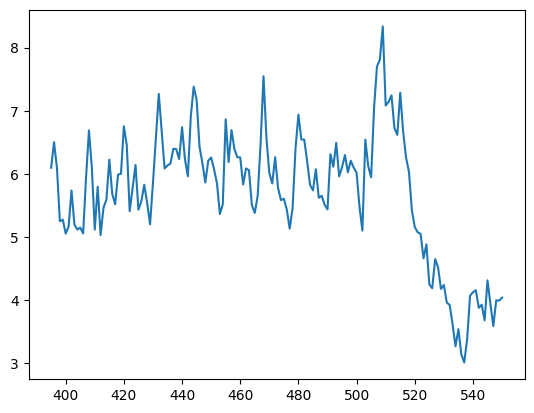

In [15]:
filtered_unemployment_df['Unemployment Rate'].plot()

**OBSERVATION**<br>
A very strong cyclic seasonal trend is witnessed in the first two-thirds of the plot (until 2019), while in the later dates (2020-2023), it is evident that unemployment is more much more sporadic, while still following a general cyclic trend of peak and non-peak unemployment periods.<br>
The data is also realistic to what is expected for unemployment data points.

<Axes: >

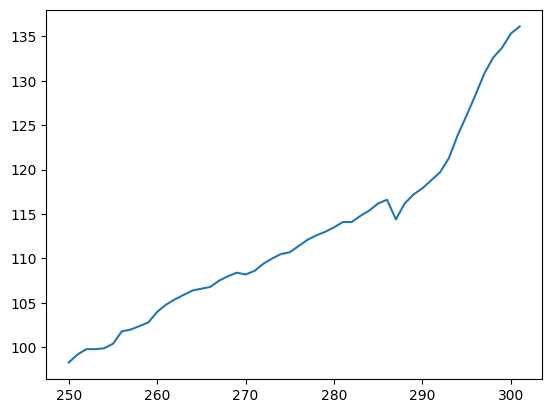

In [16]:
filtered_inflation_df['Inflation Rate'].plot()

**OBSERVATION**<br>
A clear upward trend is witnessed in the entire plot (except for a brief period in early 2020), demonstrating that inflation is not seasonal, but continues to increase in an exponential fashion over time. <br>
The data is also realistic to what is expected for inflation data points.

<Axes: >

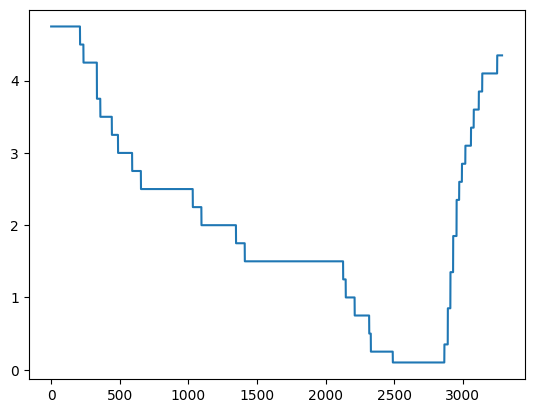

In [17]:
filtered_interest_df['Interest Rate'].plot()

**OBSERVATION**<br>
The values for interest are much more varied and have periods of upward/downward trends, along with clear periods of semi-seasonal trends. <br>
This is most evident between 2013-2016, whereby the interest level remained consistent and dropped down in the following year (2013/4-2015 vs 2015-2016), happening twice over. Further the interest from 2013-2016 continued to decrease as more of a global trend. <br>
The data is also realistic to what is expected for interest data points.

**STEP 6:** <BR>
 *Further, a combined dataframe concatting these three separates dataframes will be constructed. For this, commands such as shape, info and iloc will be utilised consistently to ensure handling of null or outlier values.*

 *Similarly, an index on date will be constructed to ensure that values are in the correct DateTime format and this will translate through the combined dataframe.*

In [18]:
filtered_unemployment_df.shape

(156, 2)

In [19]:
filtered_inflation_df.shape

(52, 2)

In [20]:
filtered_interest_df.shape

(3288, 2)

**OBSERVATION**<br>
The shape values for unemployment, inflation and interest demonstrate that the frequency of these values occur approximately monthly, quarterly and daily (excluding weekends) within the 12 year period between 2011-2023.<br>
According to https://planetcalc.com/7669/: there are approximately 3261 workdays between the specified period. There are 156 months and 52 quarters between 2011-2023 mathematically speaking.

In [21]:
# The 'Date' index is set pre-emptively to reduce the computational strain once the dataframes are concatted.
filtered_interest_df.set_index(['Date'], inplace=True)
filtered_inflation_df.set_index(['Date'], inplace=True)
filtered_unemployment_df.set_index(['Date'], inplace=True)

In [22]:
# Concatenate the DataFrames vertically
combined_df = pd.concat([filtered_interest_df, filtered_inflation_df, filtered_unemployment_df], axis=1)
print(combined_df)

            Interest Rate  Inflation Rate  Unemployment Rate
Date                                                        
2011-01-01            NaN             NaN           6.096681
2011-01-04           4.75             NaN                NaN
2011-01-05           4.75             NaN                NaN
2011-01-06           4.75             NaN                NaN
2011-01-07           4.75             NaN                NaN
...                   ...             ...                ...
2023-12-21           4.35             NaN                NaN
2023-12-22           4.35             NaN                NaN
2023-12-27           4.35             NaN                NaN
2023-12-28           4.35             NaN                NaN
2023-12-29           4.35             NaN                NaN

[3342 rows x 3 columns]


**OBSERVATION**<br>
The combined dataframe has favoured the interest dataframe's workday approach as there are close to 3342 rows. <br>
Further, all three values interest, inflation and unemployment have been successfully combined, though they all contain null values.

In [23]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3342 entries, 2011-01-01 to 2023-12-29
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Interest Rate      3288 non-null   float64
 1   Inflation Rate     52 non-null     float64
 2   Unemployment Rate  156 non-null    float64
dtypes: float64(3)
memory usage: 104.4 KB


**OBSERVATION**<br>
The combined dataframe includes only 3288/3342 non-null interest values, 52/3342 non-null inflation values and 156/3342 non-null unemployment values.<br>
As such, this must be handled through resampling the data in later steps.

In [24]:
combined_df.iloc[0:50]

,Interest Rate,Inflation Rate,Unemployment Rate
Date,,,
2011-01-01,NaN,NaN,6.096681
2011-01-04,4.75,NaN,NaN
2011-01-05,4.75,NaN,NaN
2011-01-06,4.75,NaN,NaN
2011-01-07,4.75,NaN,NaN
2011-01-10,4.75,NaN,NaN
2011-01-11,4.75,NaN,NaN
2011-01-12,4.75,NaN,NaN
2011-01-13,4.75,NaN,NaN


**OBSERVATION**<br>
A closer observation of the first 50 rows shows that indeed interest, inflation and unemployment values have been combined properly, specifically at Date = '2011-03-01' where all three values are visible.

**STEP 7:** <BR>
 *Further aggregration of the combined dataframe is required to deal with the null values. In order to be concise, it is evident that monthly would be most feasible, given that unemployment and inflation both appear monthly and quarterly respectively in the raw data, while the interest has significantly more data points at each workday between the specified time period.*

 *Mathematically speaking there are 156 months compared to 678 weeks between 2011-2023.*
 
 *1. The combined_df's null rows are printed to determine the extent that values need to be filled in.*
 
 *2. The dataframes, 'filtered_interest_df', 'filtered_unemployment_df' and 'filtered_inflation_df' will be used to resample data, this can ensure that any incurrent resampling will be accounted for locally and not effect the overall 'combined_df'.*<br>
 *It will be checked whether they have been resampled properly before aggregrating these points into a new monthly dataframe('monthly_combined_df1'), using info. This will be done through forward filling to start with.*
 
 *3. The monthly_combined_df1's null rows are printed to determine the extent that values need to be filled in. Forward/backward filling, will occur to determine whether that values have been filled in appropriately.*

 ***GOAL:** to ensure that no values are null in monthly_combined_df1 such that effective EDA can be conducted.*

In [25]:
# Print rows with empty (NaN) values in combined_df
empty_rows = combined_df[combined_df.isnull().any(axis=1)]
print(empty_rows)

            Interest Rate  Inflation Rate  Unemployment Rate
Date                                                        
2011-01-01            NaN             NaN           6.096681
2011-01-04           4.75             NaN                NaN
2011-01-05           4.75             NaN                NaN
2011-01-06           4.75             NaN                NaN
2011-01-07           4.75             NaN                NaN
...                   ...             ...                ...
2023-12-21           4.35             NaN                NaN
2023-12-22           4.35             NaN                NaN
2023-12-27           4.35             NaN                NaN
2023-12-28           4.35             NaN                NaN
2023-12-29           4.35             NaN                NaN

[3304 rows x 3 columns]


**OBSERVATION**<br>
As these values occur mostly in the future, forward filling is best as a starting point to ensure that the combined_df does not experience any null values.<br>
**FURTHER NOTE** <br>
Forward filling (also known as "pad" filling) fills missing values with the last known valid data point before the missing entry. This is useful when the previous data point is more likely to represent the missing value or trend. For example, if the data is time-dependent, such as interest, inflation and unemployment rates, it's reasonable to assume that a missing value will be similar to the last known value.

In [26]:
filtered_interest_df_resampled_monthly = filtered_interest_df.resample('M').ffill()  # Forward-filling forward per month

/tmp/ipykernel_802858/1642623924.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  filtered_interest_df_resampled_monthly = filtered_interest_df.resample('M').ffill()  # Forward-filling forward per month


In [27]:
filtered_unemployment_df_resampled_monthly = filtered_unemployment_df.resample('M').ffill()  # Forward-filling forward per month

/tmp/ipykernel_802858/2719364959.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  filtered_unemployment_df_resampled_monthly = filtered_unemployment_df.resample('M').ffill()  # Forward-filling forward per month


In [28]:
filtered_inflation_df_resampled_monthly = filtered_inflation_df.resample('M').ffill()  # Forward-filling for quarterly to month

/tmp/ipykernel_802858/3784657308.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  filtered_inflation_df_resampled_monthly = filtered_inflation_df.resample('M').ffill()  # Forward-filling for quarterly to month


In [29]:
filtered_interest_df_resampled_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 156 entries, 2011-01-31 to 2023-12-31
Freq: ME
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Interest Rate  156 non-null    float64
dtypes: float64(1)
memory usage: 2.4 KB


In [30]:
filtered_unemployment_df_resampled_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 156 entries, 2011-01-31 to 2023-12-31
Freq: ME
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unemployment Rate  156 non-null    float64
dtypes: float64(1)
memory usage: 2.4 KB


In [31]:
filtered_inflation_df_resampled_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 154 entries, 2011-03-31 to 2023-12-31
Freq: ME
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Inflation Rate  154 non-null    float64
dtypes: float64(1)
memory usage: 2.4 KB


**OBSERVATION**<br>
There should be only 2 null values in the monthly_combined_df1, given that inflation only contains 154/156 not null values. Depending on the positioning, either forward fill or backward fill will be used to fill in the gaps.

In [32]:
monthly_combined_df1 = pd.concat([filtered_interest_df_resampled_monthly, filtered_unemployment_df_resampled_monthly, filtered_inflation_df_resampled_monthly], axis = 1)

In [33]:
monthly_combined_df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 156 entries, 2011-01-31 to 2023-12-31
Freq: ME
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Interest Rate      156 non-null    float64
 1   Unemployment Rate  156 non-null    float64
 2   Inflation Rate     154 non-null    float64
dtypes: float64(3)
memory usage: 8.9 KB


In [34]:
# Print rows with empty (NaN) values in monthly_combined_df1
empty_rows = monthly_combined_df1[monthly_combined_df1.isnull().any(axis=1)]
print(empty_rows)

            Interest Rate  Unemployment Rate  Inflation Rate
Date                                                        
2011-01-31           4.75           6.096681             NaN
2011-02-28           4.75           6.500871             NaN


In [35]:
monthly_combined_df1.head()

,Interest Rate,Unemployment Rate,Inflation Rate
Date,,,
2011-01-31,4.75,6.096681,NaN
2011-02-28,4.75,6.500871,NaN
2011-03-31,4.75,6.091718,98.3
2011-04-30,4.75,5.247593,98.3
2011-05-31,4.75,5.273783,98.3


**OBSERVATION**<br>
Hence, the two null values in monthly_combined_df1 are demonstrated above in the head, As such backward fill will be used below to reassign the null values to values appearing in the latest value (after the null rows).<br>
**FURTHER NOTE** <br>
Backward filling fills missing values with future known valid data point after the missing entry. In this dataset, especially as it involves finite time series (e.g., financial reporting), backward filling is often chosen toward the end of the data cleaning process to handle any remaining edge cases where forward filling alone would not suffice.

In [36]:
monthly_combined_df1.loc['2011-01-31':'2011-03-31', 'Inflation Rate'] = monthly_combined_df1.loc['2011-01-31':'2011-03-31', 'Inflation Rate'].bfill()

In [37]:
monthly_combined_df1.head()

,Interest Rate,Unemployment Rate,Inflation Rate
Date,,,
2011-01-31,4.75,6.096681,98.3
2011-02-28,4.75,6.500871,98.3
2011-03-31,4.75,6.091718,98.3
2011-04-30,4.75,5.247593,98.3
2011-05-31,4.75,5.273783,98.3


**OBSERVATION**<br>
Inflation rate's first two values have been filled appropriately via '2011-03-31' value of 98.3.

In [38]:
monthly_combined_df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 156 entries, 2011-01-31 to 2023-12-31
Freq: ME
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Interest Rate      156 non-null    float64
 1   Unemployment Rate  156 non-null    float64
 2   Inflation Rate     156 non-null    float64
dtypes: float64(3)
memory usage: 8.9 KB


**OBSERVATION**<br>
All values are non-null in 'monthly_combined_df1'.

**STEP 8 (Optional Step):** <BR>
 *Split the datasets month-wise for EDA in Question 2.*

In [39]:
monthly_2011 = monthly_combined_df1['2011-01-01':'2011-12-31']
monthly_2012 = monthly_combined_df1['2012-01-01':'2012-12-31']
monthly_2013 = monthly_combined_df1['2013-01-01':'2013-12-31']
monthly_2014 = monthly_combined_df1['2014-01-01':'2014-12-31']
monthly_2015 = monthly_combined_df1['2015-01-01':'2015-12-31']
monthly_2016 = monthly_combined_df1['2016-01-01':'2016-12-31']
monthly_2017 = monthly_combined_df1['2017-01-01':'2017-12-31']
monthly_2018 = monthly_combined_df1['2018-01-01':'2018-12-31']
monthly_2019 = monthly_combined_df1['2019-01-01':'2019-12-31']
monthly_2020 = monthly_combined_df1['2020-01-01':'2020-12-31']
monthly_2021 = monthly_combined_df1['2021-01-01':'2021-12-31']
monthly_2022 = monthly_combined_df1['2022-01-01':'2022-12-31']
monthly_2023 = monthly_combined_df1['2023-01-01':'2023-12-31']

# Question 2
**Exploratory Data Analysis (EDA): <br>
Visualise the data timeseries, and comment on the patterns you can observe with respect to the features discussed in the lectures. Include visualisations appropriate for uncertainty and correlation where appropriate.**

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Monthly Plots by Year: comparing Unemployment, Interest and Inflation

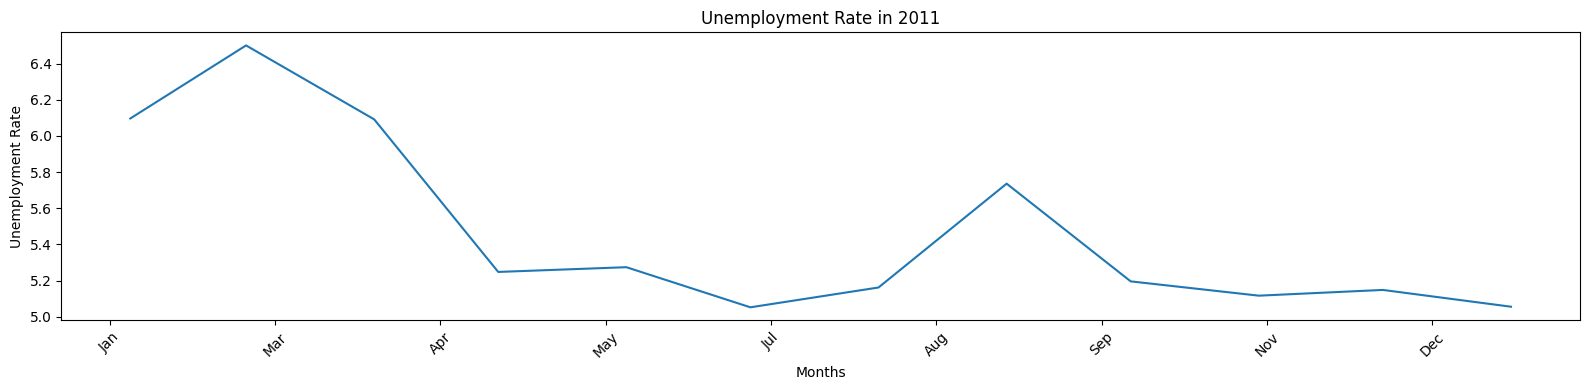

In [41]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the unemployment rate
sns.lineplot(data=monthly_2011, x='Date', y='Unemployment Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Unemployment Rate in 2011")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Unemployment Rate')

# Format the x-axis to show all months
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(12))  # Ensure 12 ticks for each month
axes[0, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Show month names (Jan, Feb, etc.)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

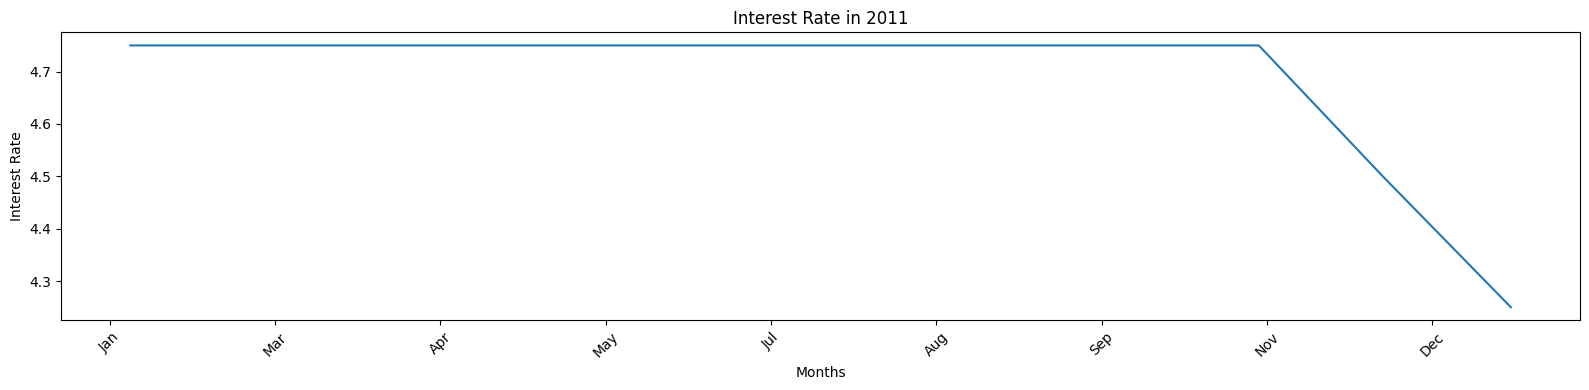

In [42]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the interest rate
sns.lineplot(data=monthly_2011, x='Date', y='Interest Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Interest Rate in 2011")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Interest Rate')

# Format the x-axis to show all months
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(12))  # Ensure 12 ticks for each month
axes[0, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Show month names (Jan, Feb, etc.)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

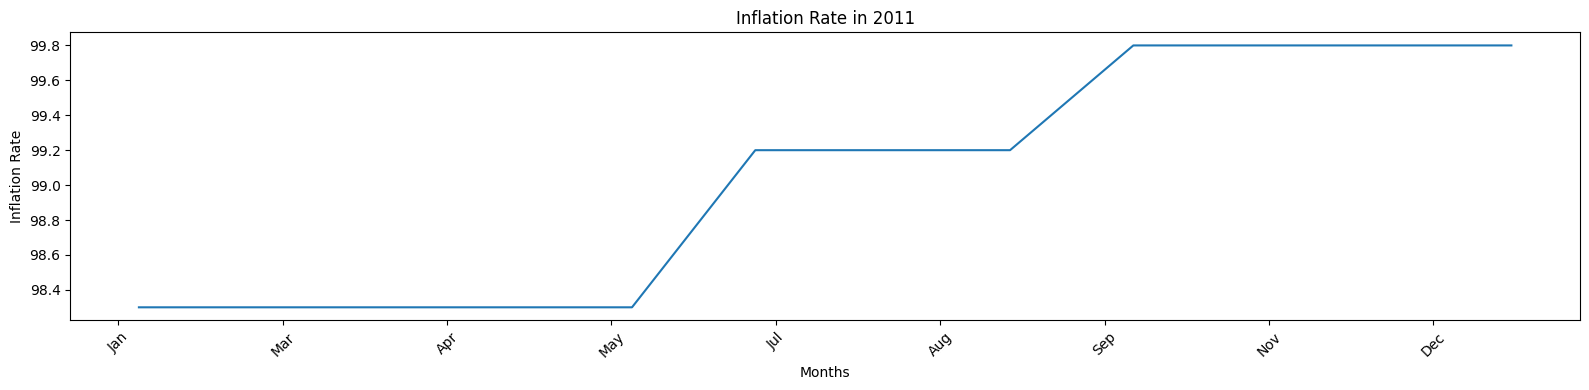

In [43]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the inflation rate
sns.lineplot(data=monthly_2011, x='Date', y='Inflation Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Inflation Rate in 2011")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Inflation Rate')

# Format the x-axis to show all months
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(12))  # Ensure 12 ticks for each month
axes[0, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Show month names (Jan, Feb, etc.)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**OBSERVATION**<BR>
Australia's unemployment rate remained relatively stable around 5%. Inflation was moderate, the interest rates to be maintained at 4.75%. The steady economic environment supported employment growth, with low inflation preventing any changes.

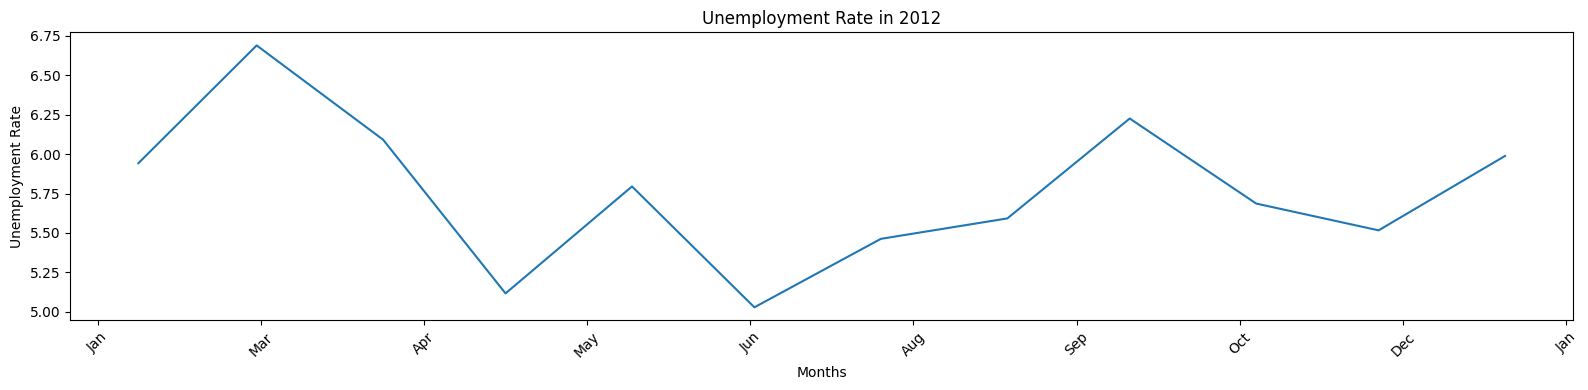

In [44]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the unemployment rate
sns.lineplot(data=monthly_2012, x='Date', y='Unemployment Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Unemployment Rate in 2012")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Unemployment Rate')

# Format the x-axis to show all months
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(12))  # Ensure 12 ticks for each month
axes[0, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Show month names (Jan, Feb, etc.)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

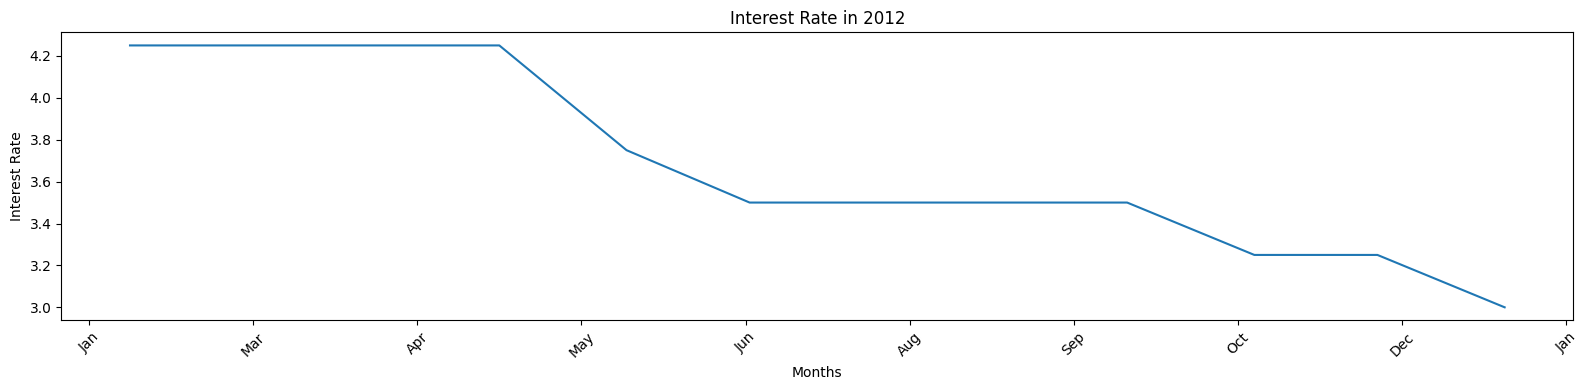

In [45]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the interest rate
sns.lineplot(data=monthly_2012, x='Date', y='Interest Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Interest Rate in 2012")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Interest Rate')

# Format the x-axis to show all months
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(12))  # Ensure 12 ticks for each month
axes[0, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Show month names (Jan, Feb, etc.)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

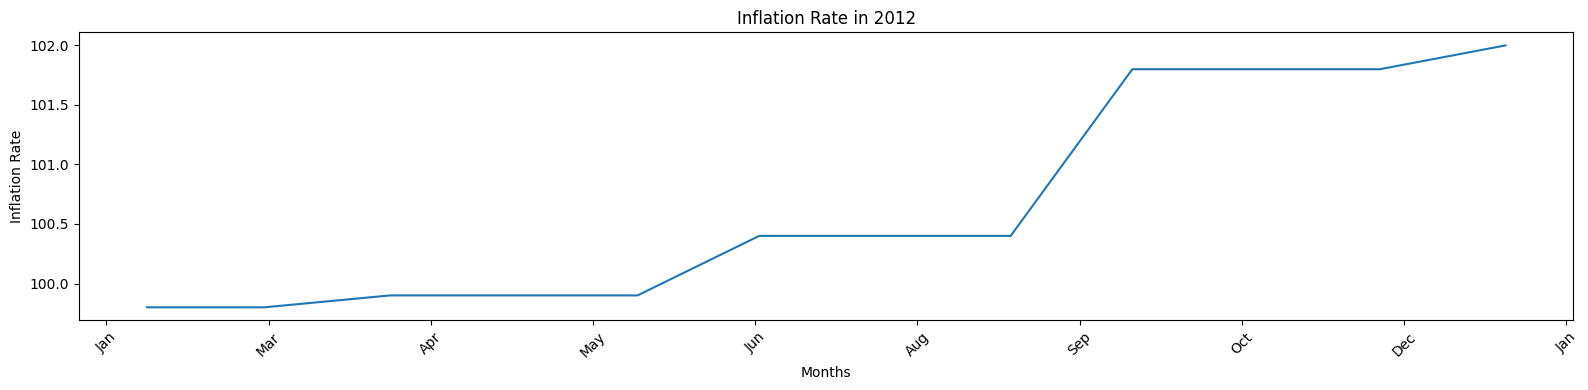

In [46]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the inflation rate
sns.lineplot(data=monthly_2012, x='Date', y='Inflation Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Inflation Rate in 2012")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Inflation Rate')

# Format the x-axis to show all months
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(12))  # Ensure 12 ticks for each month
axes[0, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Show month names (Jan, Feb, etc.)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**OBSERVATION**<BR>
The unemployment rate slightly increased to, while inflation increased though not concerningly so, prompting lowering interest rates to 3% to stimulate economic activity. 

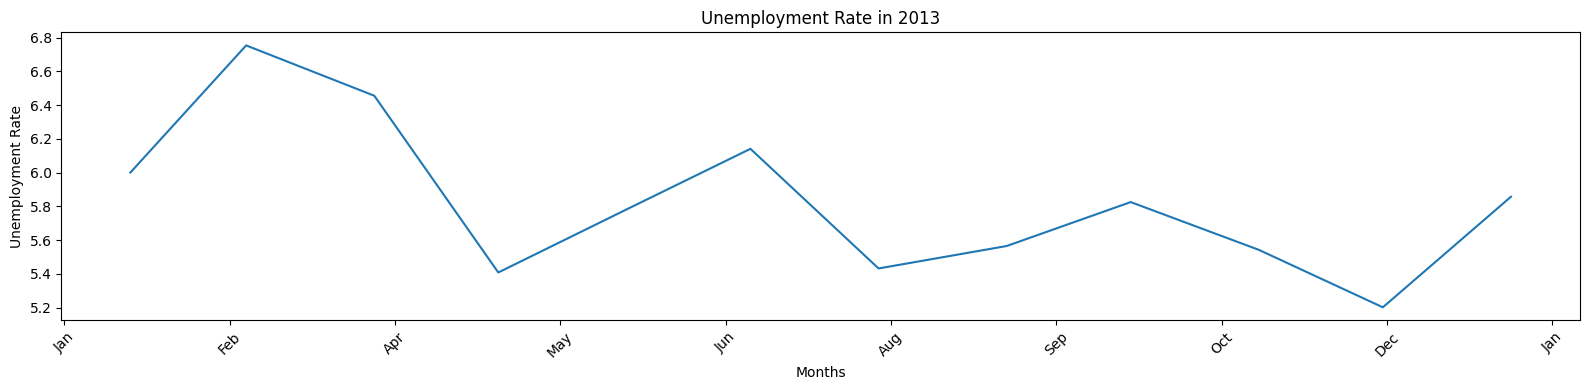

In [47]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the unemployment rate
sns.lineplot(data=monthly_2013, x='Date', y='Unemployment Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Unemployment Rate in 2013")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Unemployment Rate')

# Format the x-axis to show all months
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(12))  # Ensure 12 ticks for each month
axes[0, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Show month names (Jan, Feb, etc.)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

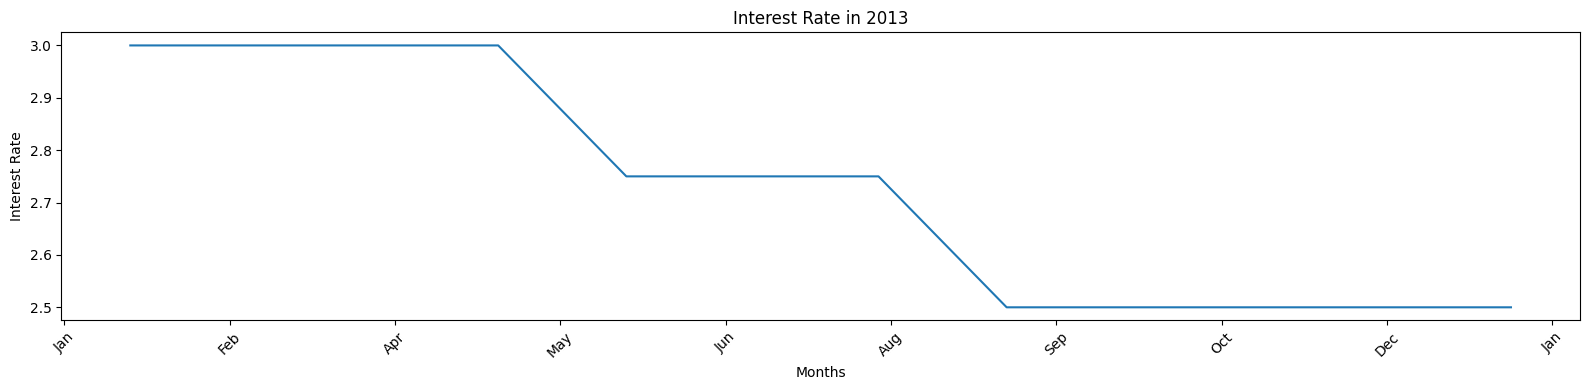

In [48]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the interest rate
sns.lineplot(data=monthly_2013, x='Date', y='Interest Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Interest Rate in 2013")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Interest Rate')

# Format the x-axis to show all months
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(12))  # Ensure 12 ticks for each month
axes[0, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Show month names (Jan, Feb, etc.)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

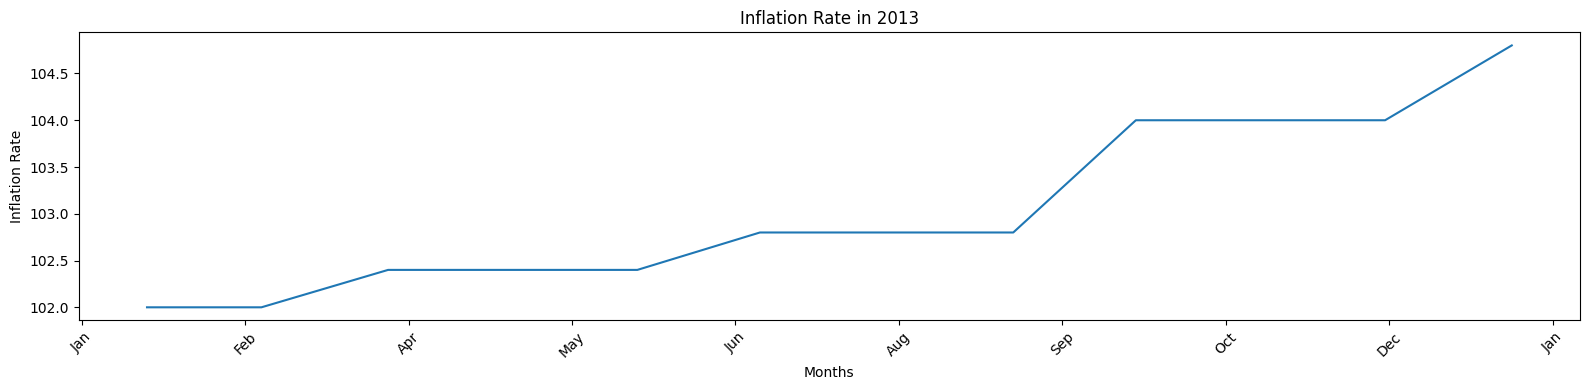

In [49]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the inflation rate
sns.lineplot(data=monthly_2013, x='Date', y='Inflation Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Inflation Rate in 2013")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Inflation Rate')

# Format the x-axis to show all months
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(12))  # Ensure 12 ticks for each month
axes[0, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Show month names (Jan, Feb, etc.)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**OBSERVATION**<BR>
Unemployment rose compared to the previous year amongst lowering inflation and slowing economic growth. The interest rates kept reducing, bringing them down to 2.5% by the end of the year. These rate cuts aimed to increase consumer confidence and support employment, reflecting the negative correlation between unemployment and interest rates.

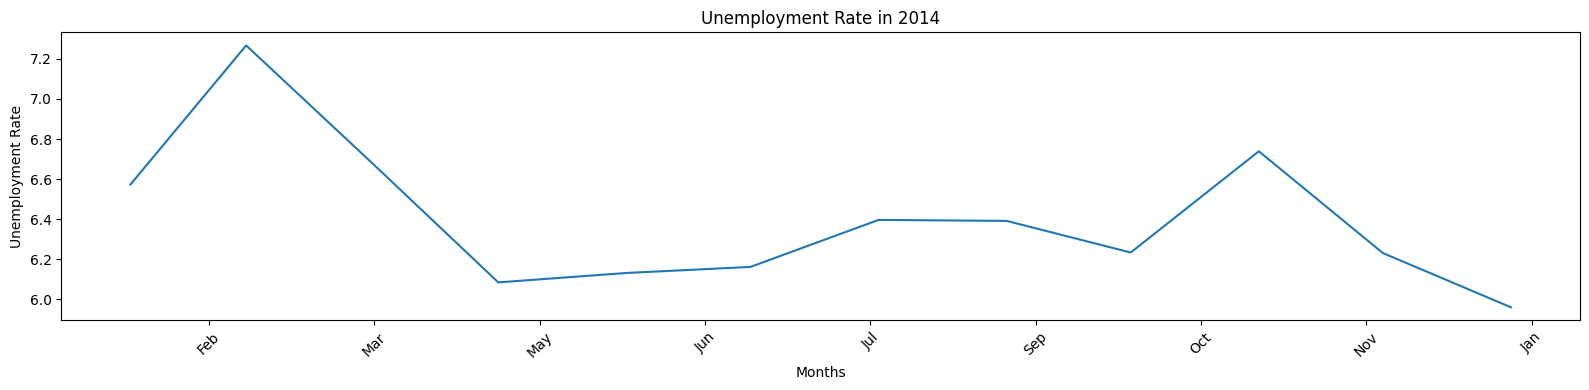

In [50]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the unemployment rate
sns.lineplot(data=monthly_2014, x='Date', y='Unemployment Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Unemployment Rate in 2014")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Unemployment Rate')

# Format the x-axis to show all months
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(12))  # Ensure 12 ticks for each month
axes[0, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Show month names (Jan, Feb, etc.)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

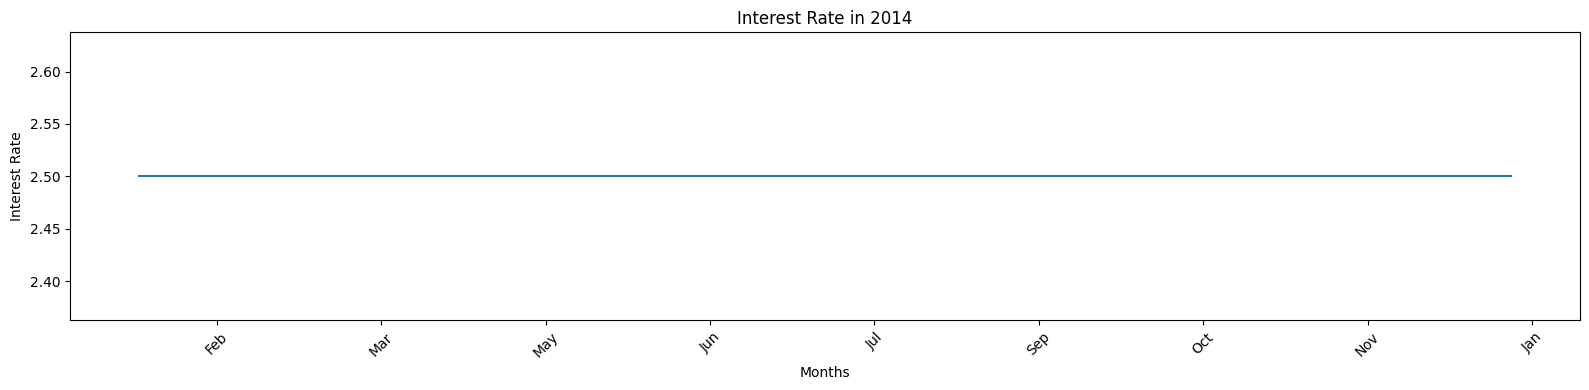

In [51]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the interest rate
sns.lineplot(data=monthly_2014, x='Date', y='Interest Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Interest Rate in 2014")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Interest Rate')

# Format the x-axis to show all months
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(12))  # Ensure 12 ticks for each month
axes[0, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Show month names (Jan, Feb, etc.)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

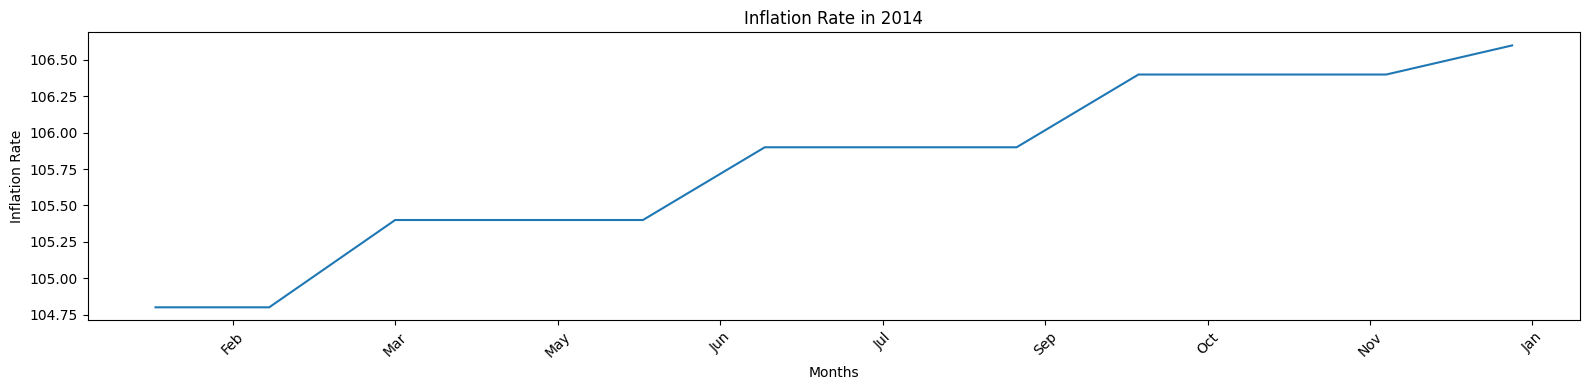

In [52]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the inflation rate
sns.lineplot(data=monthly_2014, x='Date', y='Inflation Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Inflation Rate in 2014")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Inflation Rate')

# Format the x-axis to show all months
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(12))  # Ensure 12 ticks for each month
axes[0, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Show month names (Jan, Feb, etc.)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**OBSERVATION**<BR>
Unemployment rate fluctuated around 6.0%, with inflation remaining low. Interest rates were maintained at 2.5%, focusing on promoting economic stability. This environment contributed to modest improvements in employment as the economy gradually recovered (in future years).

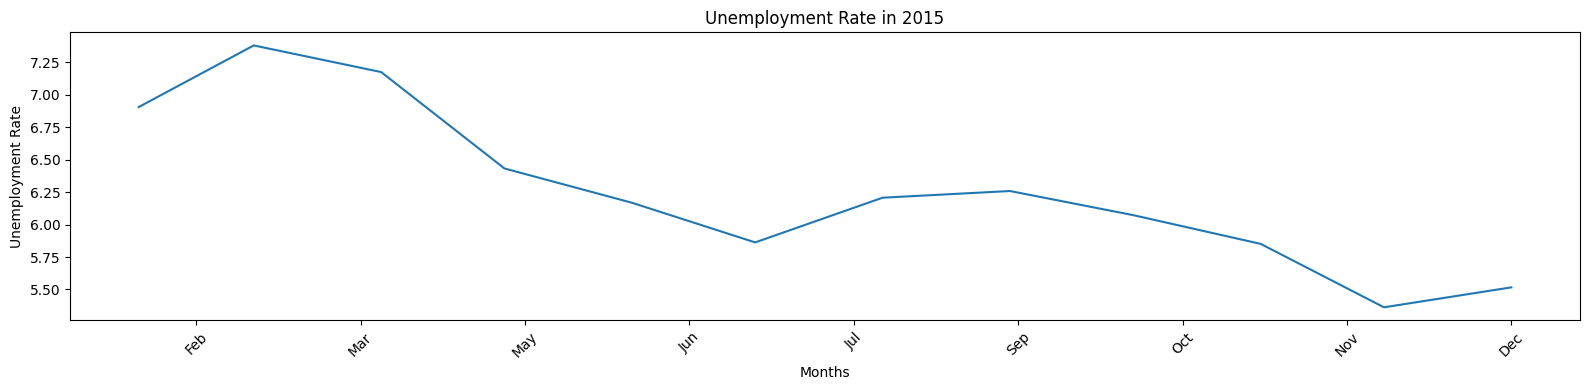

In [53]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the unemployment rate
sns.lineplot(data=monthly_2015, x='Date', y='Unemployment Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Unemployment Rate in 2015")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Unemployment Rate')

# Format the x-axis to show all months
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(12))  # Ensure 12 ticks for each month
axes[0, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Show month names (Jan, Feb, etc.)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

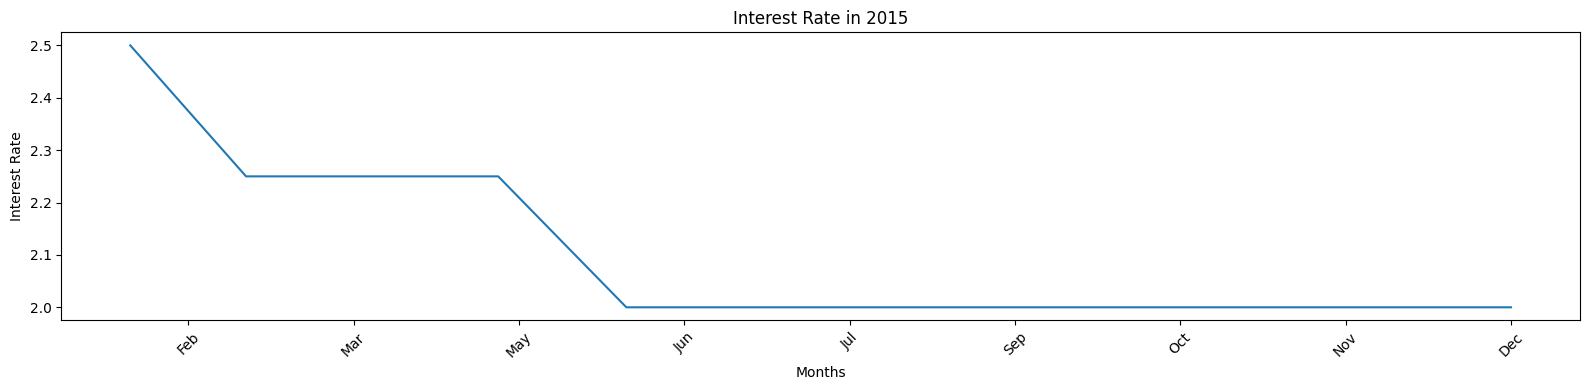

In [54]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the interest rate
sns.lineplot(data=monthly_2015, x='Date', y='Interest Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Interest Rate in 2015")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Interest Rate')

# Format the x-axis to show all months
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(12))  # Ensure 12 ticks for each month
axes[0, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Show month names (Jan, Feb, etc.)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

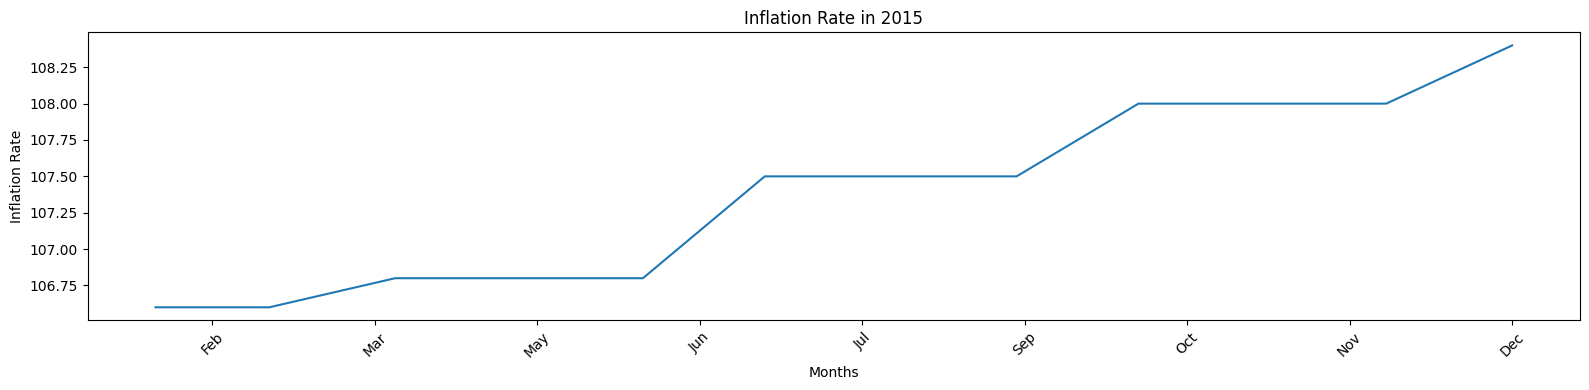

In [55]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the inflation rate
sns.lineplot(data=monthly_2015, x='Date', y='Inflation Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Inflation Rate in 2015")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Inflation Rate')

# Format the x-axis to show all months
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(12))  # Ensure 12 ticks for each month
axes[0, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Show month names (Jan, Feb, etc.)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**OBSERVATION**<BR>
Unemployment decreased to approximately 5.9%, and inflation remained low, prompting the interest rates to be kept steady. The stable economic conditions and low rates encouraged investment, supporting continued job growth in various sectors.

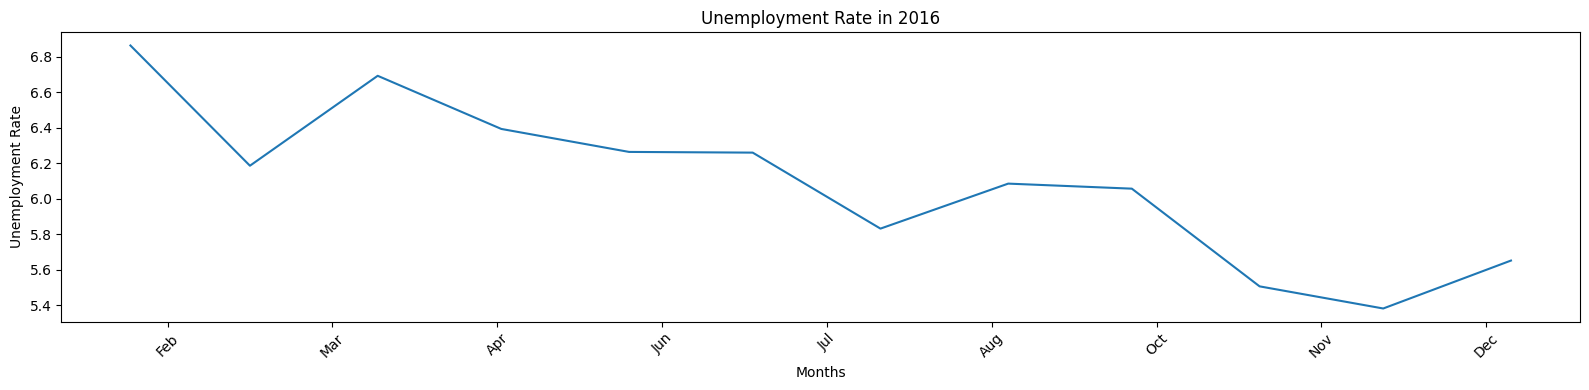

In [56]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the unemployment rate
sns.lineplot(data=monthly_2016, x='Date', y='Unemployment Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Unemployment Rate in 2016")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Unemployment Rate')

# Format the x-axis to show all months
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(12))  # Ensure 12 ticks for each month
axes[0, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Show month names (Jan, Feb, etc.)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

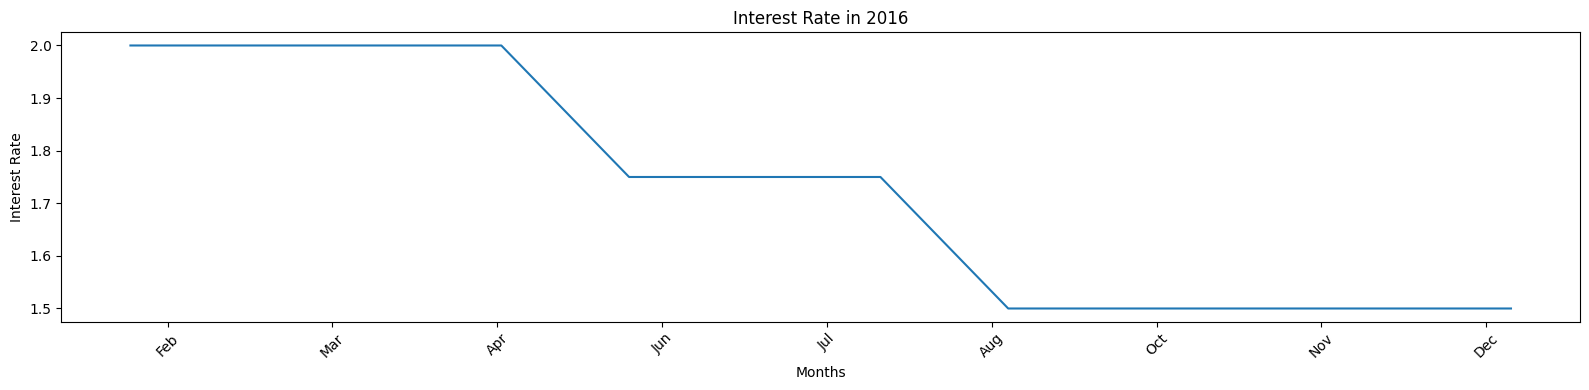

In [57]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the interest rate
sns.lineplot(data=monthly_2016, x='Date', y='Interest Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Interest Rate in 2016")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Interest Rate')

# Format the x-axis to show all months
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(12))  # Ensure 12 ticks for each month
axes[0, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Show month names (Jan, Feb, etc.)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

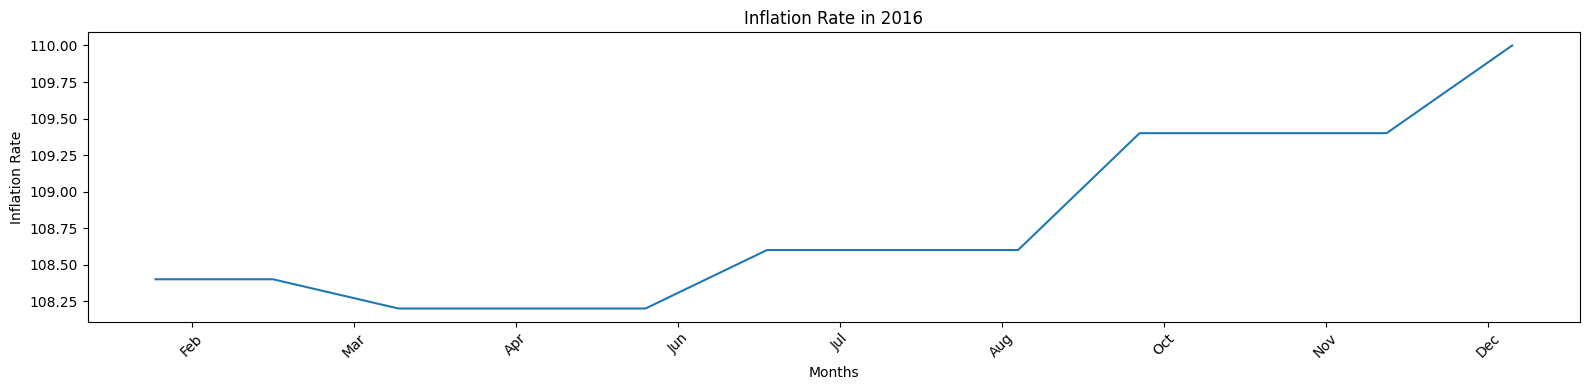

In [58]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the inflation rate
sns.lineplot(data=monthly_2016, x='Date', y='Inflation Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Inflation Rate in 2016")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Inflation Rate')

# Format the x-axis to show all months
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(12))  # Ensure 12 ticks for each month
axes[0, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Show month names (Jan, Feb, etc.)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**OBSERVATION**<BR>
Unemployment rate fell to 5.7%, while inflation remained below the target range. Interest rates remained between 1.5-1.7% throughout the year, aiming to stimulate economic activity and support further declines in unemployment, emphasising the link between interest rates and employment levels.

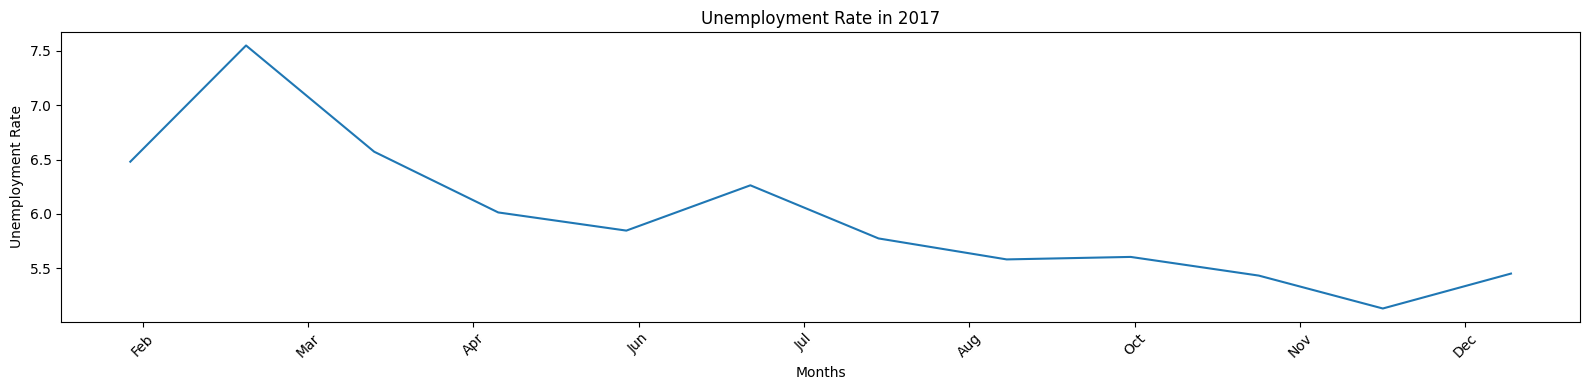

In [59]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the unemployment rate
sns.lineplot(data=monthly_2017, x='Date', y='Unemployment Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Unemployment Rate in 2017")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Unemployment Rate')

# Format the x-axis to show all months
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(12))  # Ensure 12 ticks for each month
axes[0, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Show month names (Jan, Feb, etc.)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

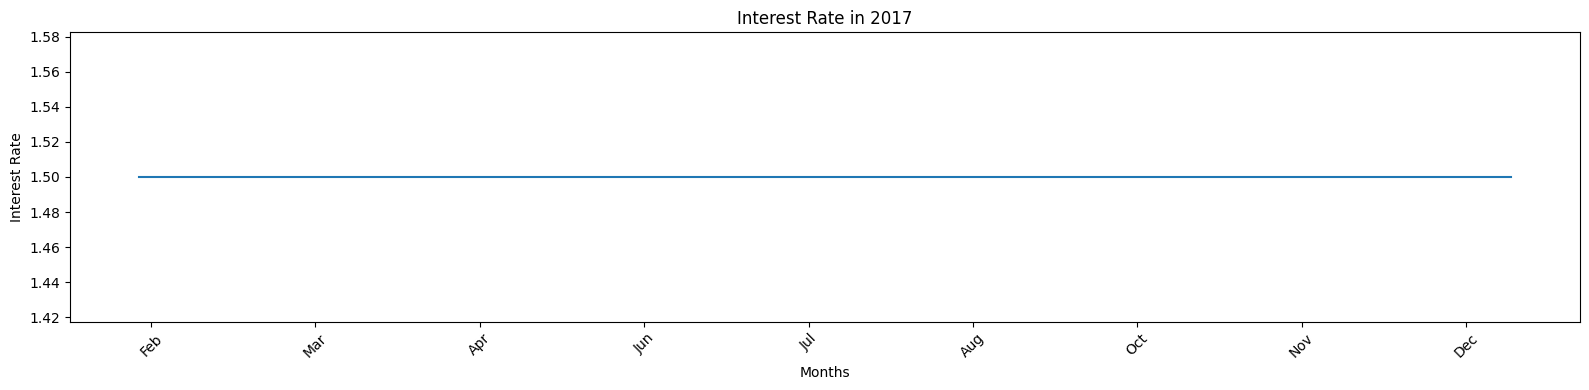

In [60]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the interest rate
sns.lineplot(data=monthly_2017, x='Date', y='Interest Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Interest Rate in 2017")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Interest Rate')

# Format the x-axis to show all months
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(12))  # Ensure 12 ticks for each month
axes[0, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Show month names (Jan, Feb, etc.)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

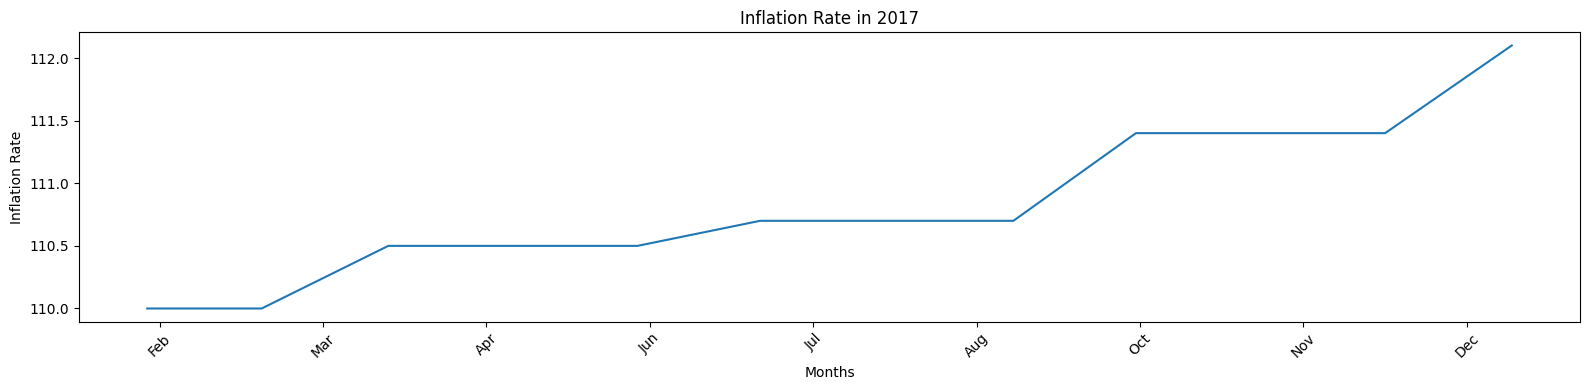

In [61]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the inflation rate
sns.lineplot(data=monthly_2017, x='Date', y='Inflation Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Inflation Rate in 2017")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Inflation Rate')

# Format the x-axis to show all months
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(12))  # Ensure 12 ticks for each month
axes[0, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Show month names (Jan, Feb, etc.)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**OBSERVATION**<BR>
Unemployment rate decreased further to around 5.5%. Inflation began to rise slightly (not visible until 2018), prompting increasing interest rate hikes. The interest rates were maintained at 1.5%, balancing the need to support economic growth while monitoring inflationary pressures.

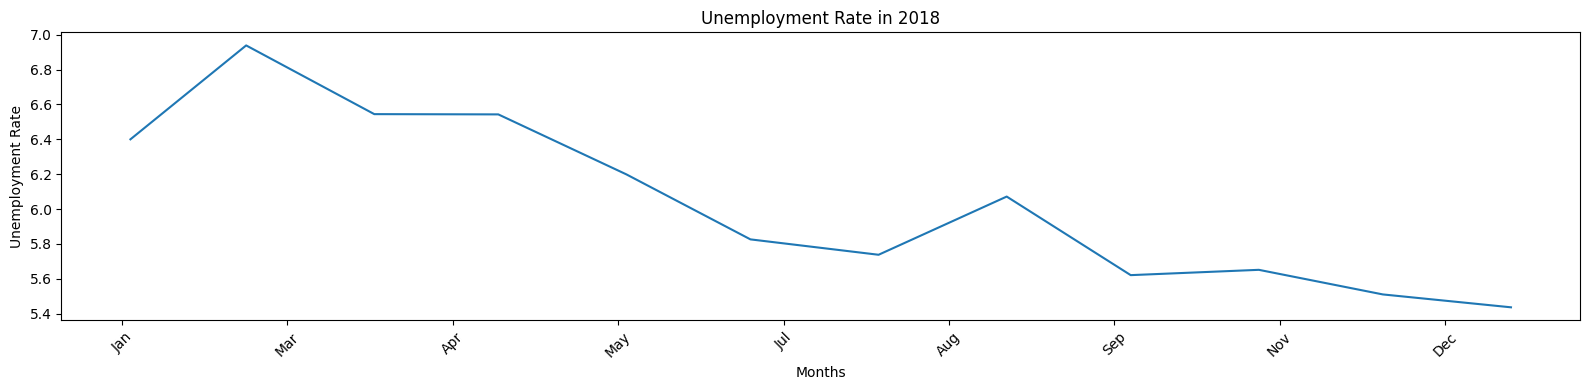

In [62]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the unemployment rate
sns.lineplot(data=monthly_2018, x='Date', y='Unemployment Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Unemployment Rate in 2018")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Unemployment Rate')

# Format the x-axis to show all months
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(12))  # Ensure 12 ticks for each month
axes[0, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Show month names (Jan, Feb, etc.)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

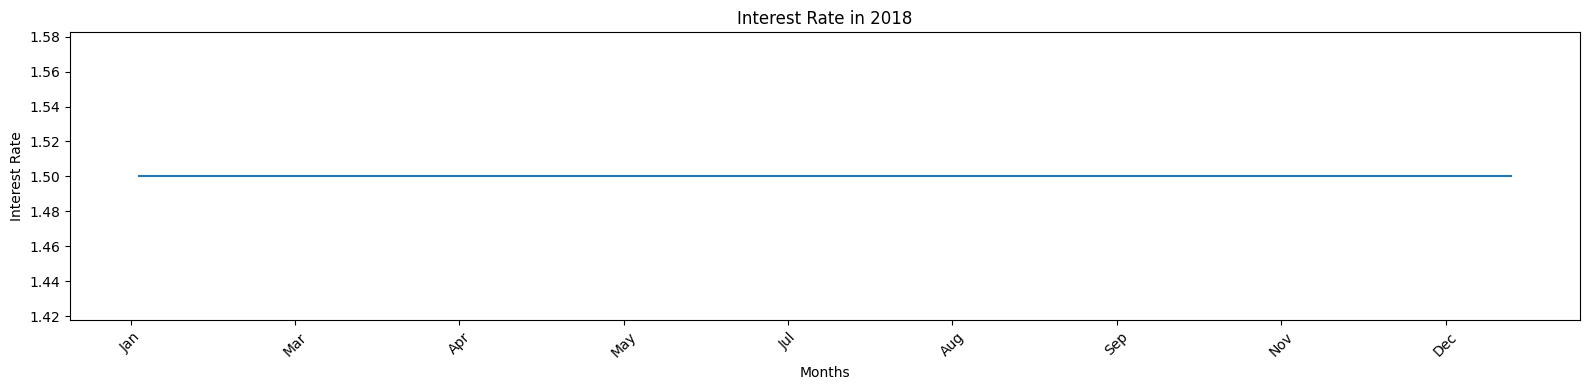

In [63]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the interest rate
sns.lineplot(data=monthly_2018, x='Date', y='Interest Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Interest Rate in 2018")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Interest Rate')

# Format the x-axis to show all months
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(12))  # Ensure 12 ticks for each month
axes[0, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Show month names (Jan, Feb, etc.)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

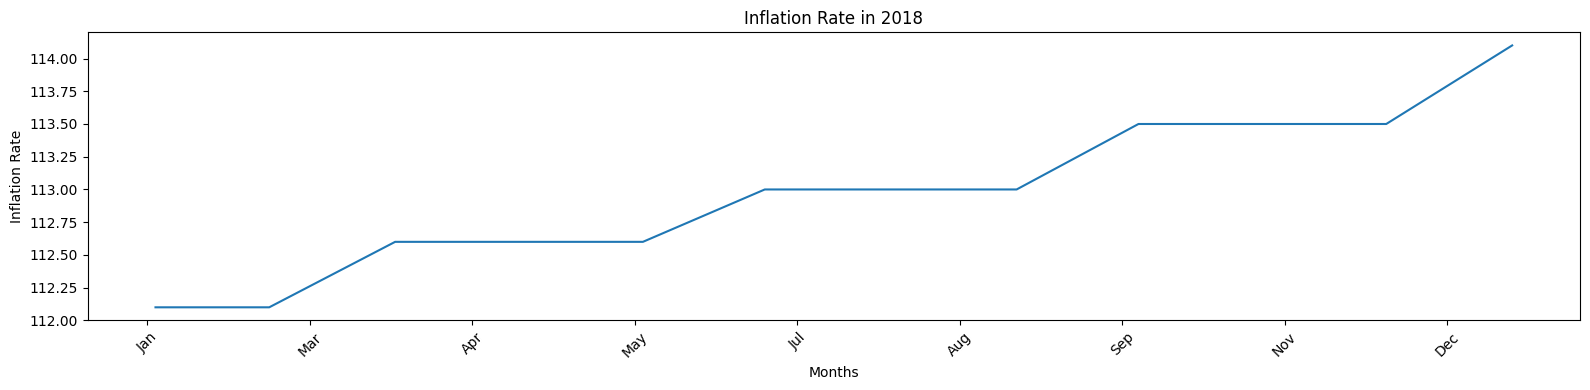

In [64]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the inflation rate
sns.lineplot(data=monthly_2018, x='Date', y='Inflation Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Inflation Rate in 2018")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Inflation Rate')

# Format the x-axis to show all months
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(12))  # Ensure 12 ticks for each month
axes[0, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Show month names (Jan, Feb, etc.)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**OBSERVATION**<BR>
Unemployment rate continued going downwards to 5.4%, and inflation reached near the target range, prompting the consideration of adjusting interest rates. However, rates remained at 1.5% to foster stable economic growth without triggering inflation.

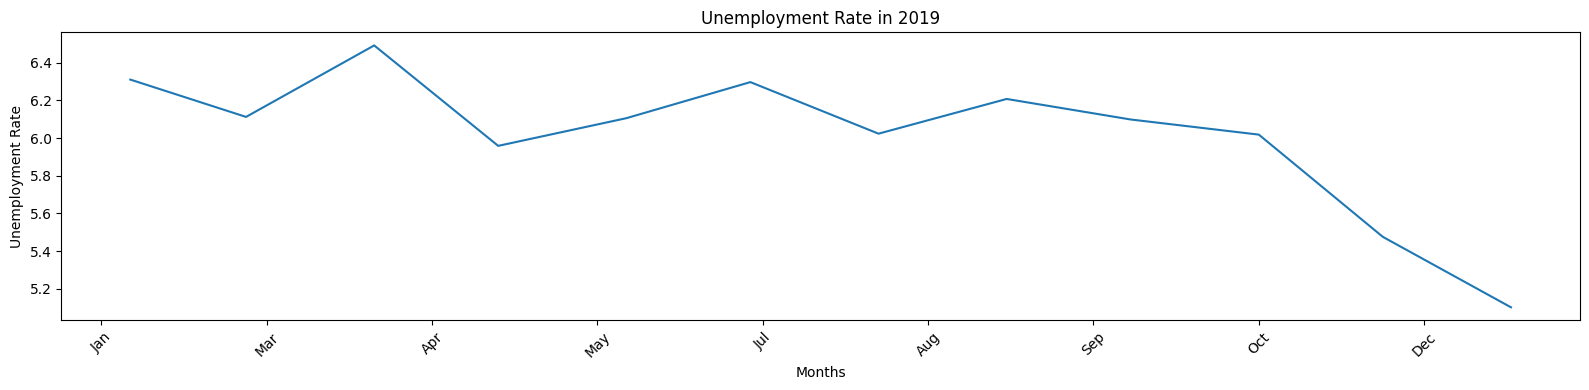

In [65]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the unemployment rate
sns.lineplot(data=monthly_2019, x='Date', y='Unemployment Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Unemployment Rate in 2019")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Unemployment Rate')

# Format the x-axis to show all months
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(12))  # Ensure 12 ticks for each month
axes[0, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Show month names (Jan, Feb, etc.)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

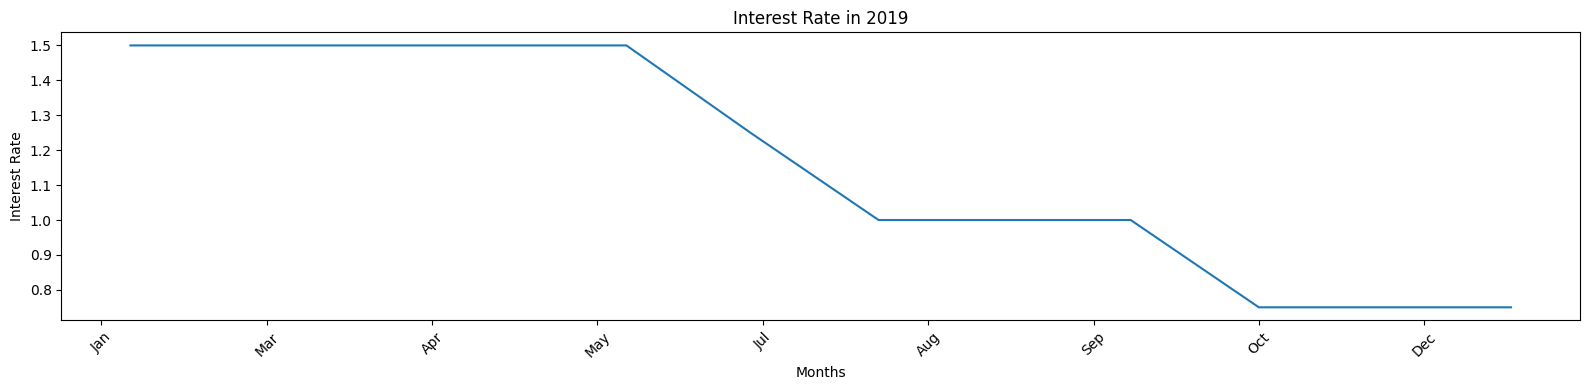

In [66]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the interest rate
sns.lineplot(data=monthly_2019, x='Date', y='Interest Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Interest Rate in 2019")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Interest Rate')

# Format the x-axis to show all months
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(12))  # Ensure 12 ticks for each month
axes[0, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Show month names (Jan, Feb, etc.)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

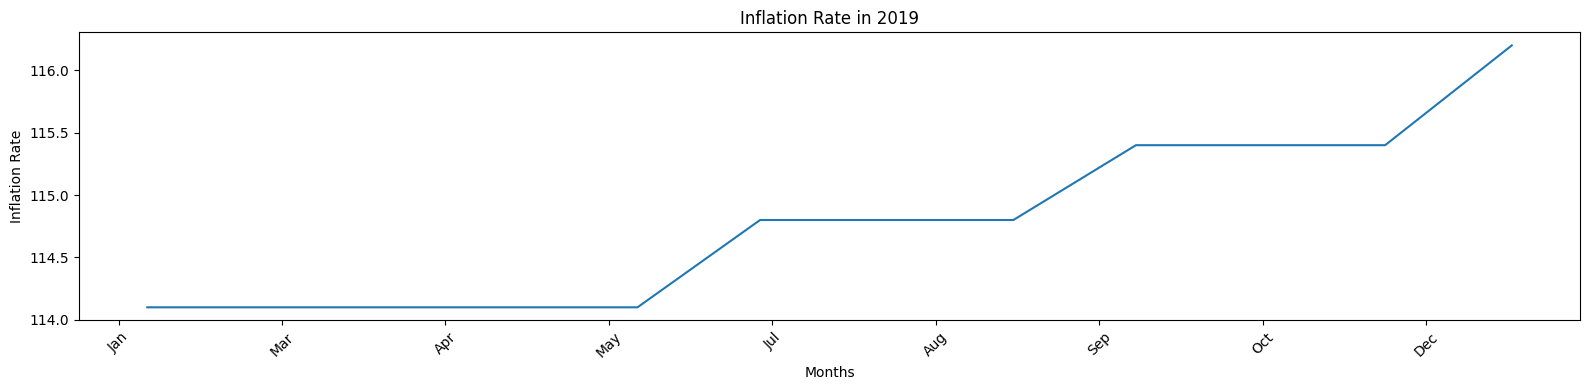

In [67]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the inflation rate
sns.lineplot(data=monthly_2019, x='Date', y='Inflation Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Inflation Rate in 2019")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Inflation Rate')

# Format the x-axis to show all months
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(12))  # Ensure 12 ticks for each month
axes[0, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Show month names (Jan, Feb, etc.)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**OBSERVATION**<BR>
Unemployment remained around relatively stable, while inflation was relatively weak. The interest rates were cut to 0.75% to stimulate borrowing and investment, highlighting the trade-off between supporting employment and managing inflation.

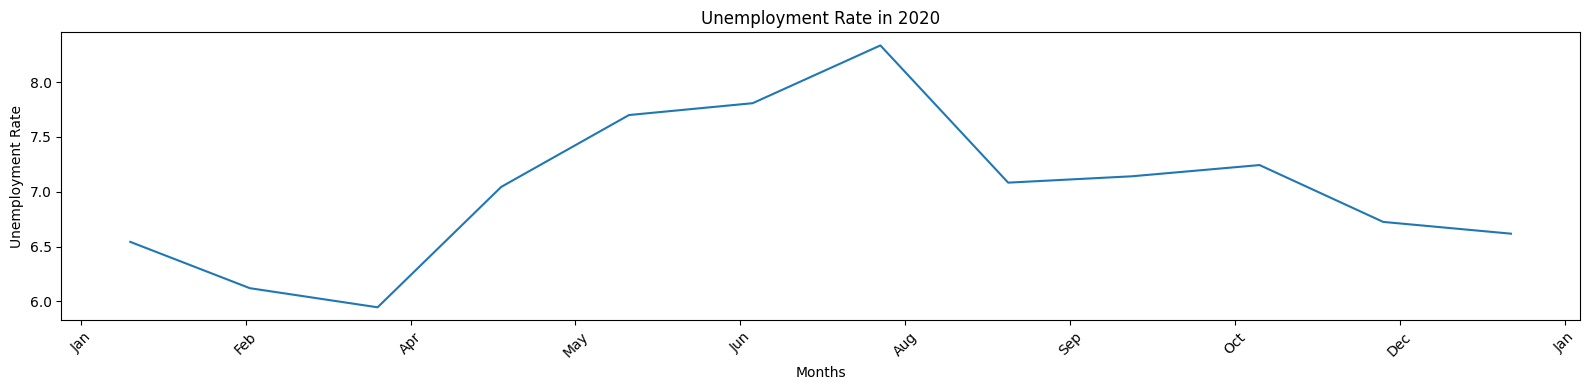

In [68]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the unemployment rate
sns.lineplot(data=monthly_2020, x='Date', y='Unemployment Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Unemployment Rate in 2020")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Unemployment Rate')

# Format the x-axis to show all months
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(12))  # Ensure 12 ticks for each month
axes[0, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Show month names (Jan, Feb, etc.)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

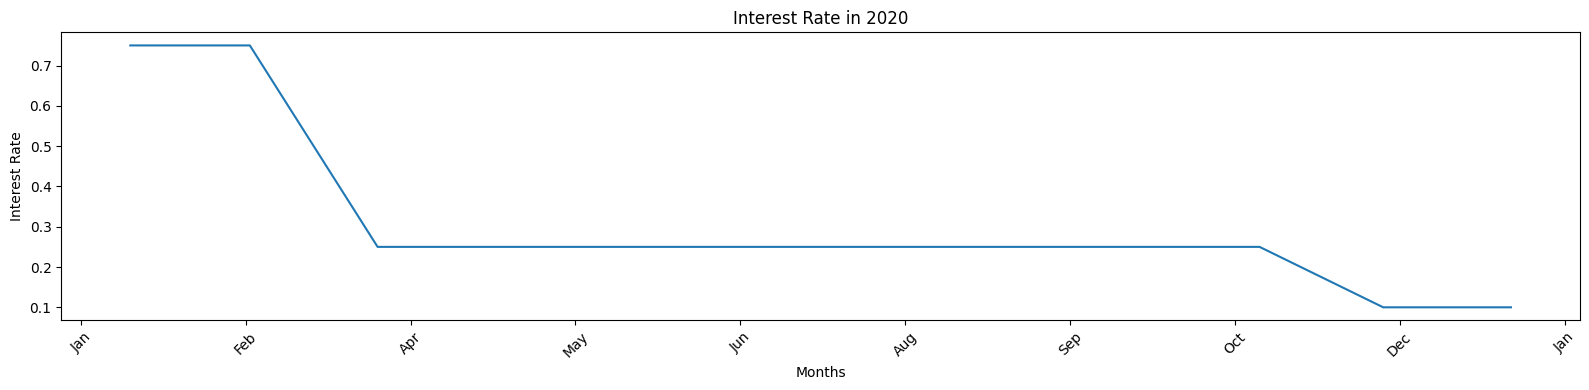

In [69]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the interest rate
sns.lineplot(data=monthly_2020, x='Date', y='Interest Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Interest Rate in 2020")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Interest Rate')

# Format the x-axis to show all months
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(12))  # Ensure 12 ticks for each month
axes[0, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Show month names (Jan, Feb, etc.)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

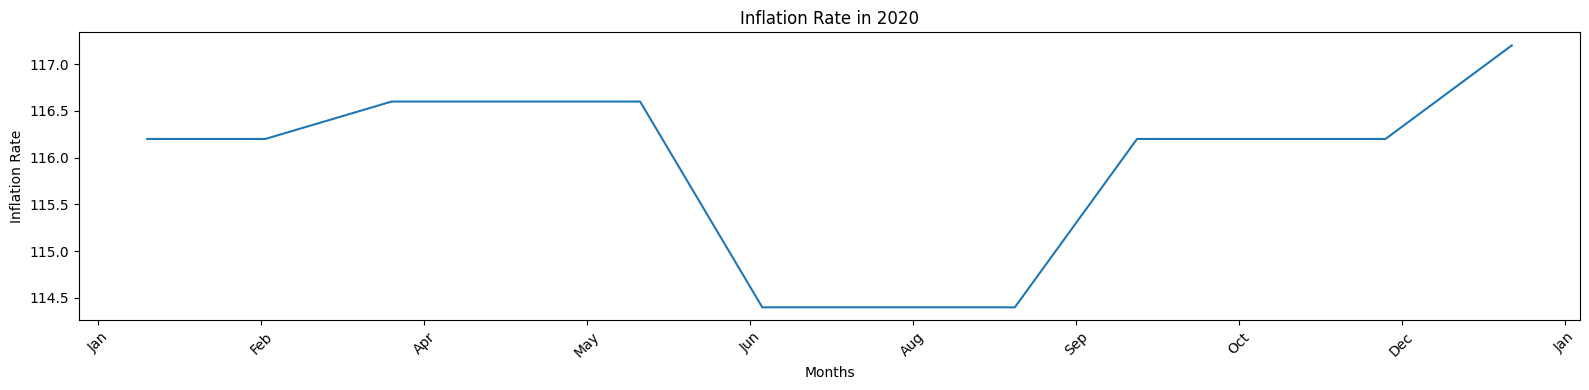

In [70]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the inflation rate
sns.lineplot(data=monthly_2020, x='Date', y='Inflation Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Inflation Rate in 2020")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Inflation Rate')

# Format the x-axis to show all months
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(12))  # Ensure 12 ticks for each month
axes[0, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Show month names (Jan, Feb, etc.)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**OBSERVATION**<BR>
COVID-19 pandemic caused a sharp rise in unemployment, while inflation reduced significantly. The interest rates were lowered to 0.25%, so that  quantitative easing to support the economy and job retention during the crisis could be implemented.

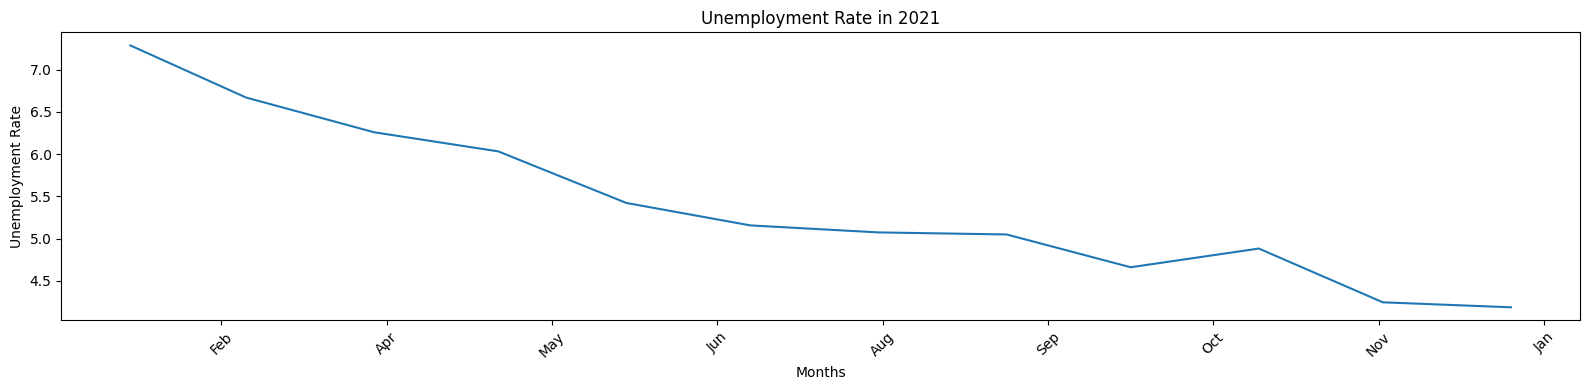

In [71]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the unemployment rate
sns.lineplot(data=monthly_2021, x='Date', y='Unemployment Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Unemployment Rate in 2021")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Unemployment Rate')

# Format the x-axis to show all months
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(12))  # Ensure 12 ticks for each month
axes[0, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Show month names (Jan, Feb, etc.)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

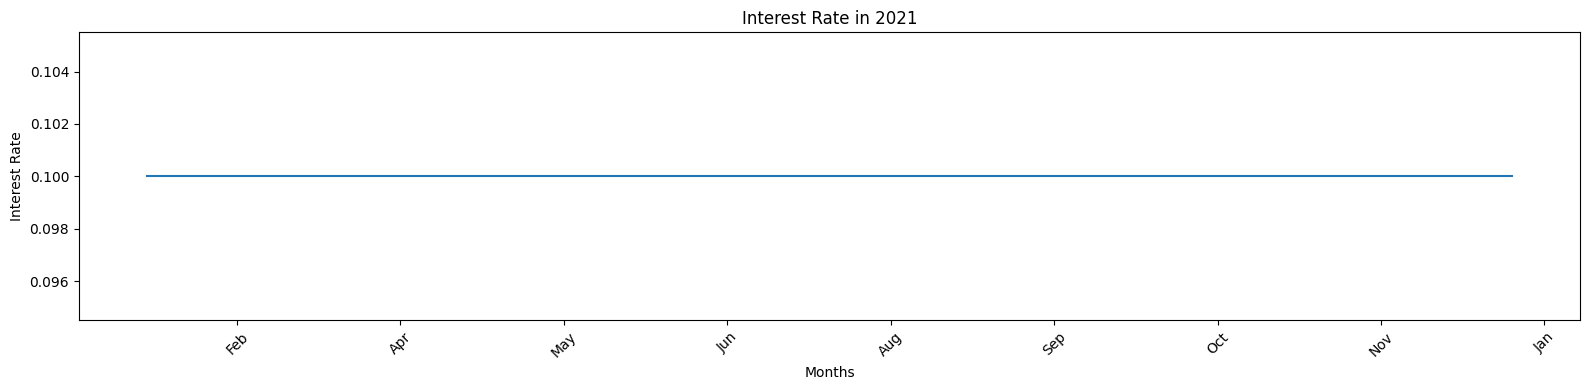

In [72]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the interest rate
sns.lineplot(data=monthly_2021, x='Date', y='Interest Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Interest Rate in 2021")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Interest Rate')

# Format the x-axis to show all months
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(12))  # Ensure 12 ticks for each month
axes[0, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Show month names (Jan, Feb, etc.)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

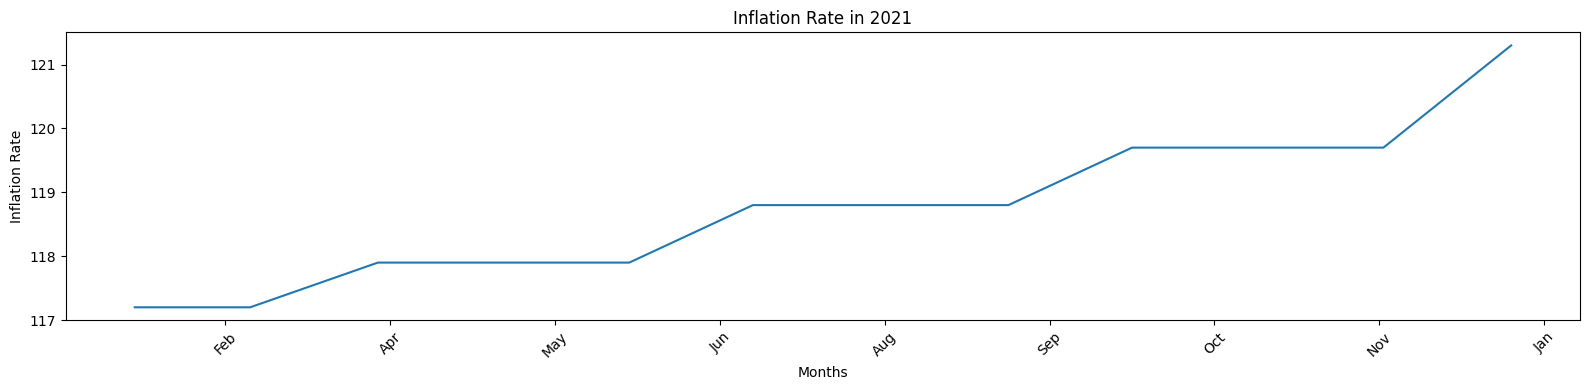

In [73]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the inflation rate
sns.lineplot(data=monthly_2021, x='Date', y='Inflation Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Inflation Rate in 2021")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Inflation Rate')

# Format the x-axis to show all months
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(12))  # Ensure 12 ticks for each month
axes[0, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Show month names (Jan, Feb, etc.)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**OBSERVATION**<BR>
Unemployment gradually improved, demonstrated by the lowering trend in the graph, as the economy recovered from the pandemic. Inflation began to rise, leading to potential interest rate adjustments (to increase in 2022). The focus remained on supporting employment amid changing economic conditions.

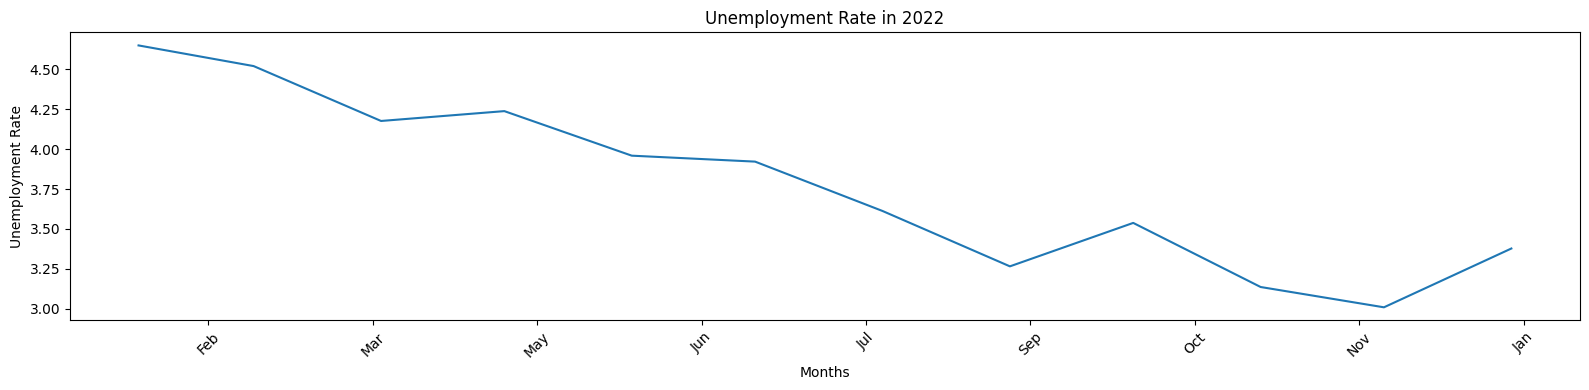

In [74]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the unemployment rate
sns.lineplot(data=monthly_2022, x='Date', y='Unemployment Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Unemployment Rate in 2022")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Unemployment Rate')

# Format the x-axis to show all months
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(12))  # Ensure 12 ticks for each month
axes[0, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Show month names (Jan, Feb, etc.)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

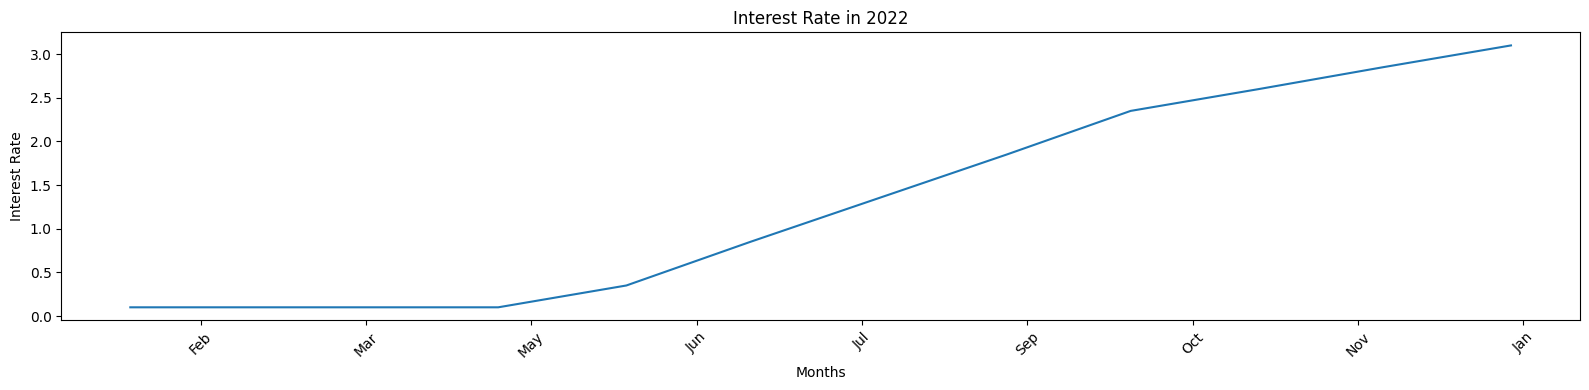

In [75]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the interest rate
sns.lineplot(data=monthly_2022, x='Date', y='Interest Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Interest Rate in 2022")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Interest Rate')

# Format the x-axis to show all months
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(12))  # Ensure 12 ticks for each month
axes[0, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Show month names (Jan, Feb, etc.)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

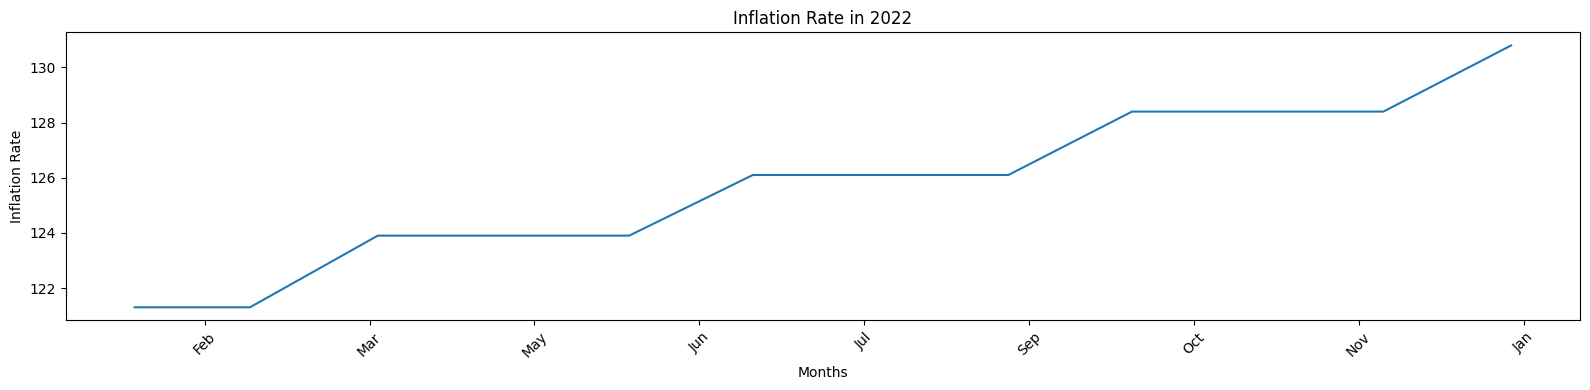

In [76]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the inflation rate
sns.lineplot(data=monthly_2022, x='Date', y='Inflation Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Inflation Rate in 2022")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Inflation Rate')

# Format the x-axis to show all months
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(12))  # Ensure 12 ticks for each month
axes[0, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Show month names (Jan, Feb, etc.)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**OBSERVATION**<BR>
In 2022, unemployment further declined, while inflation surged, reaching highs. In response, interest rates increased, signaling a shift in monetary policy to combat rising inflation while trying to maintain low unemployment.

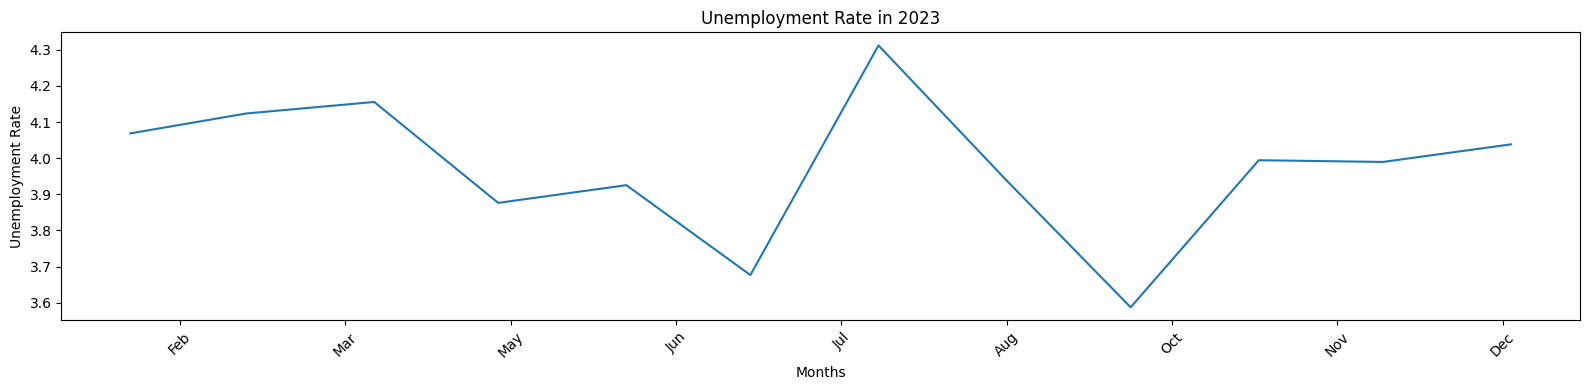

In [77]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the unemployment rate
sns.lineplot(data=monthly_2023, x='Date', y='Unemployment Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Unemployment Rate in 2023")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Unemployment Rate')

# Format the x-axis to show all months
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(12))  # Ensure 12 ticks for each month
axes[0, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Show month names (Jan, Feb, etc.)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

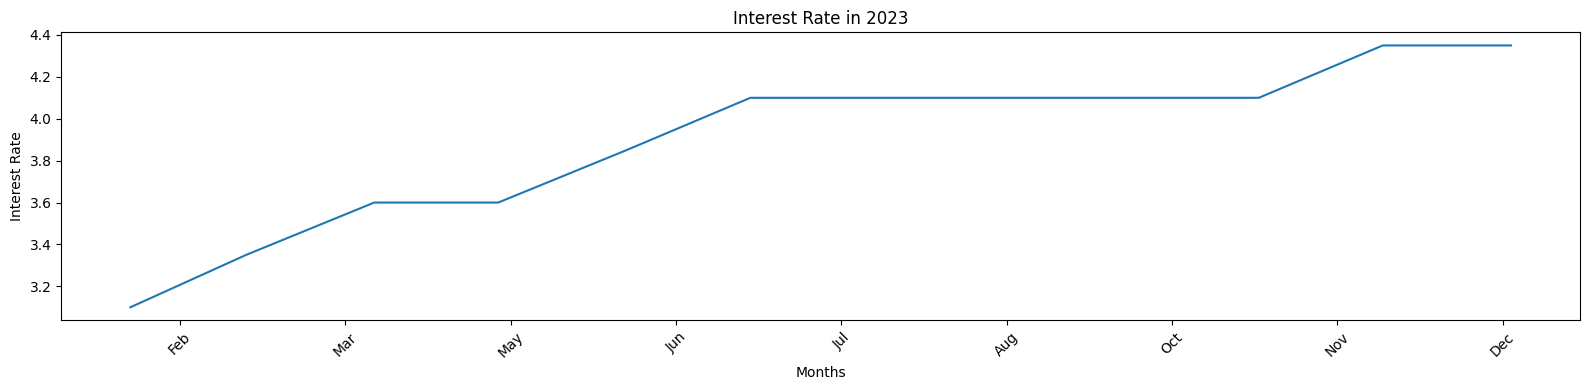

In [78]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the interest rate
sns.lineplot(data=monthly_2023, x='Date', y='Interest Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Interest Rate in 2023")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Interest Rate')

# Format the x-axis to show all months
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(12))  # Ensure 12 ticks for each month
axes[0, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Show month names (Jan, Feb, etc.)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

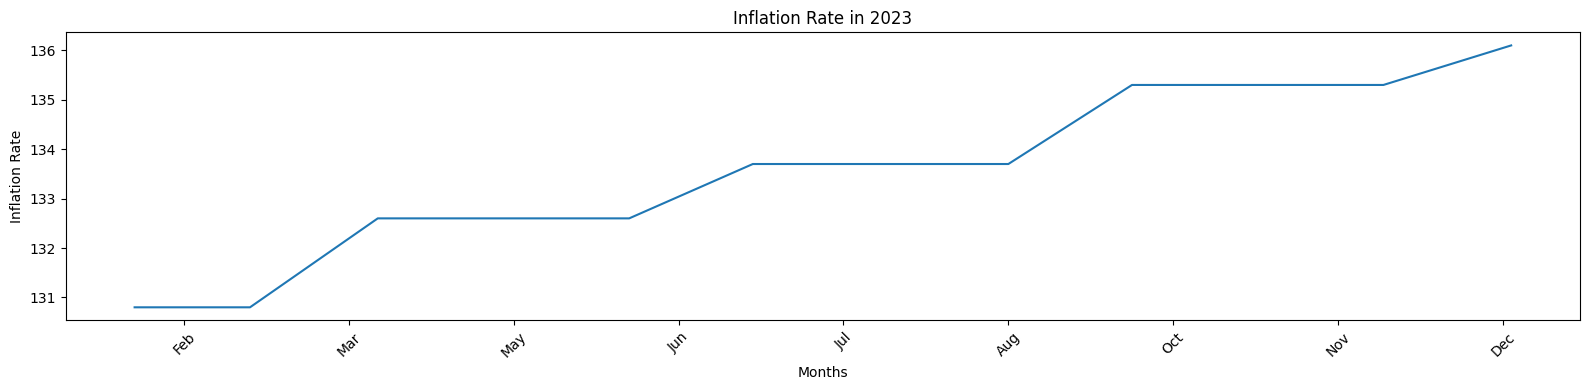

In [79]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the inflation rate
sns.lineplot(data=monthly_2023, x='Date', y='Inflation Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Inflation Rate in 2023")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Inflation Rate')

# Format the x-axis to show all months
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(12))  # Ensure 12 ticks for each month
axes[0, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Show month names (Jan, Feb, etc.)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**OBSERVATION**<BR>
Unemployment remained low around 3.8, but inflation continued to be a concern, leading to multiple interest rate hikes throughout the year. This period illustrated the delicate balance between sustaining low unemployment and addressing persistent inflationary pressures.

### Overall Plot
* Comparison With: **Question 1**, ***STEP 5***

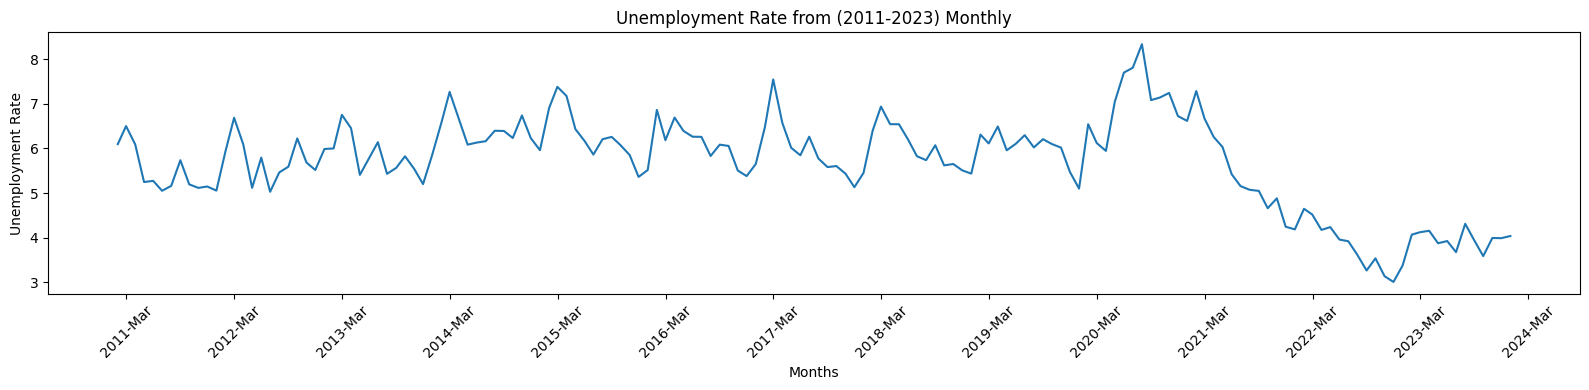

In [80]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the unemployment rate
sns.lineplot(data=monthly_combined_df1, x='Date', y='Unemployment Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Unemployment Rate from (2011-2023) Monthly")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Unemployment Rate')

# Format the x-axis to ensure all months are visible
axes[0, 0].xaxis.set_major_locator(mdates.MonthLocator(interval=12))  # Show one tick per year (12-month interval)
axes[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))   # Show year and month (e.g., 2011-Jan)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to avoid clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

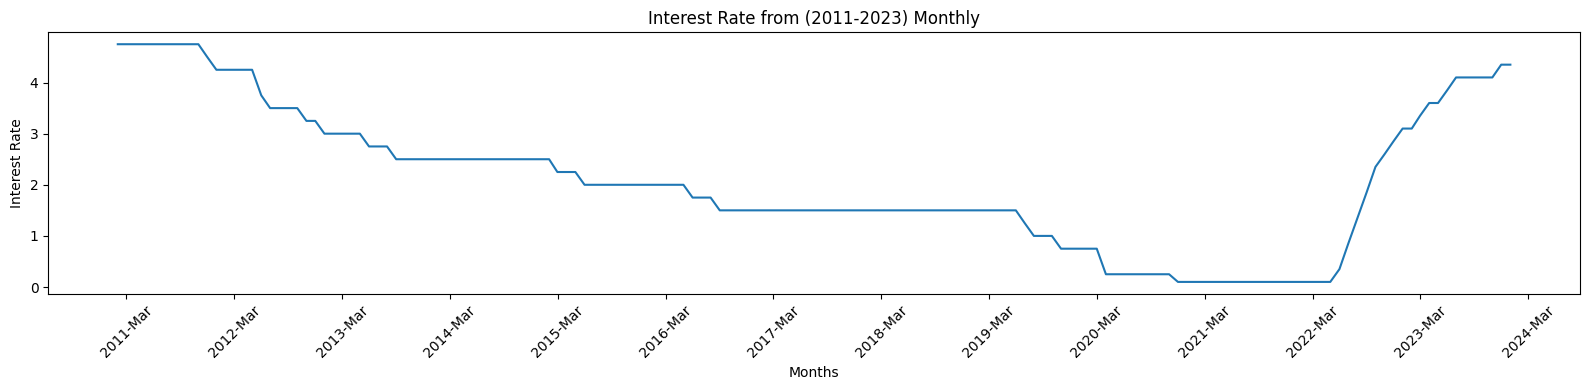

In [81]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the interest rate
sns.lineplot(data=monthly_combined_df1, x='Date', y='Interest Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Interest Rate from (2011-2023) Monthly")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Interest Rate')

# Format the x-axis to ensure all months are visible
axes[0, 0].xaxis.set_major_locator(mdates.MonthLocator(interval=12))  # Show one tick per year (12-month interval)
axes[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))   # Show year and month (e.g., 2011-Jan)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to avoid clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

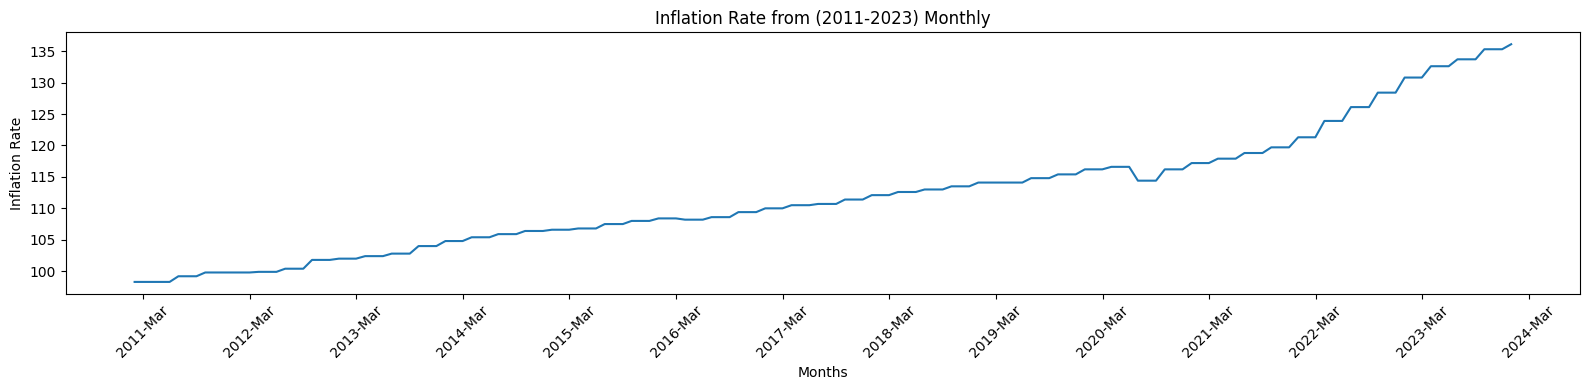

In [82]:
# Create a line plot
fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches(16, 4)

# Plot the inflation rate
sns.lineplot(data=monthly_combined_df1, x='Date', y='Inflation Rate', ax=axes[0, 0])

# Set the title and labels
axes[0, 0].set_title("Inflation Rate from (2011-2023) Monthly")
axes[0, 0].set_xlabel('Months')
axes[0, 0].set_ylabel('Inflation Rate')

# Format the x-axis to ensure all months are visible
axes[0, 0].xaxis.set_major_locator(mdates.MonthLocator(interval=12))  # Show one tick per year (12-month interval)
axes[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))   # Show year and month (e.g., 2011-Jan)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to avoid clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

**OBSERVATION**<br>
There is no major shape difference for either unemployment, interest not inflation when compared to Question 1's Step 5 plot. However it is evident that due to data aggregration following that step these three plots are much smoother, less noisy and due to having periodic measurements (whether that is filled in from other data points), demonstrating these three attributes much more clearly.

## Correlation Matrix

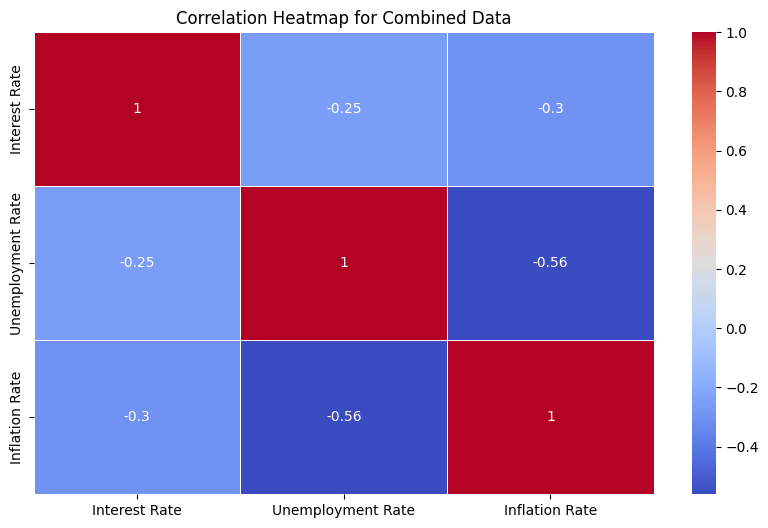

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace non-numeric values with NaN
monthly_combined_df1 = monthly_combined_df1.apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix
correlation_matrix = monthly_combined_df1.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Customize the plot
plt.title('Correlation Heatmap for Combined Data')
plt.show()

**OBSERVATION**<br>
The heatmap displays the correlation between different columns in the combined dataset, which includes "Interest Rate", "Unemployment Rate" and "Inflation Rate". The color of each cell in the heatmap represents the strength and direction of the correlation: positive correlations are shown in warmer colors (closer to red), while negative correlations are displayed in cooler colors (closer to blue).

None of the variables specified by the heat map have any correlation between them, given the visualisation demonstrates all blue cells when comparing. Unemployment specifically has very negative correlation with inflation (-0.56), while it does have slightly more, but still negative, correlation with interest (-0.25). Finally, interest and inflation also have moderately negative correlation at -0.3. This visualisation helps identify which variables have meaningful relationships and provides insights into the dataset's structure.

# Question 3
**STR decomposition: Focus now on the unemployment timeseries. <br>
a. Split the data into training and testing series, selecting the testing series to be the last three years of the data (2021-2023). <br>
b. Manually step through the STR decomposition process on the training data, as described in the course material. Visualise and interpret each of the components of the STR decomposition for unemployment. (Hint: You may wish to validate the output of your manual process against an automated modelling approach.)**

### a) Spiltting data into training and testing series

In [84]:
import pandas as pd

# Define the start and end dates for training and testing
train_start_date = '2011-01-01'
train_end_date = '2020-12-31'
test_start_date = '2021-01-01'
test_end_date = '2023-12-31'

# Split the data into training and testing
training_data = monthly_combined_df1[(monthly_combined_df1.index >= train_start_date) & (monthly_combined_df1.index <= train_end_date)]
testing_data = monthly_combined_df1[(monthly_combined_df1.index >= test_start_date) & (monthly_combined_df1.index <= test_end_date)]

# Print the shapes of training and testing data
print("Training Data Shape:", training_data.shape)
print("Testing Data Shape:", testing_data.shape)

Training Data Shape: (120, 3)
Testing Data Shape: (36, 3)


### b) STR decomposition process

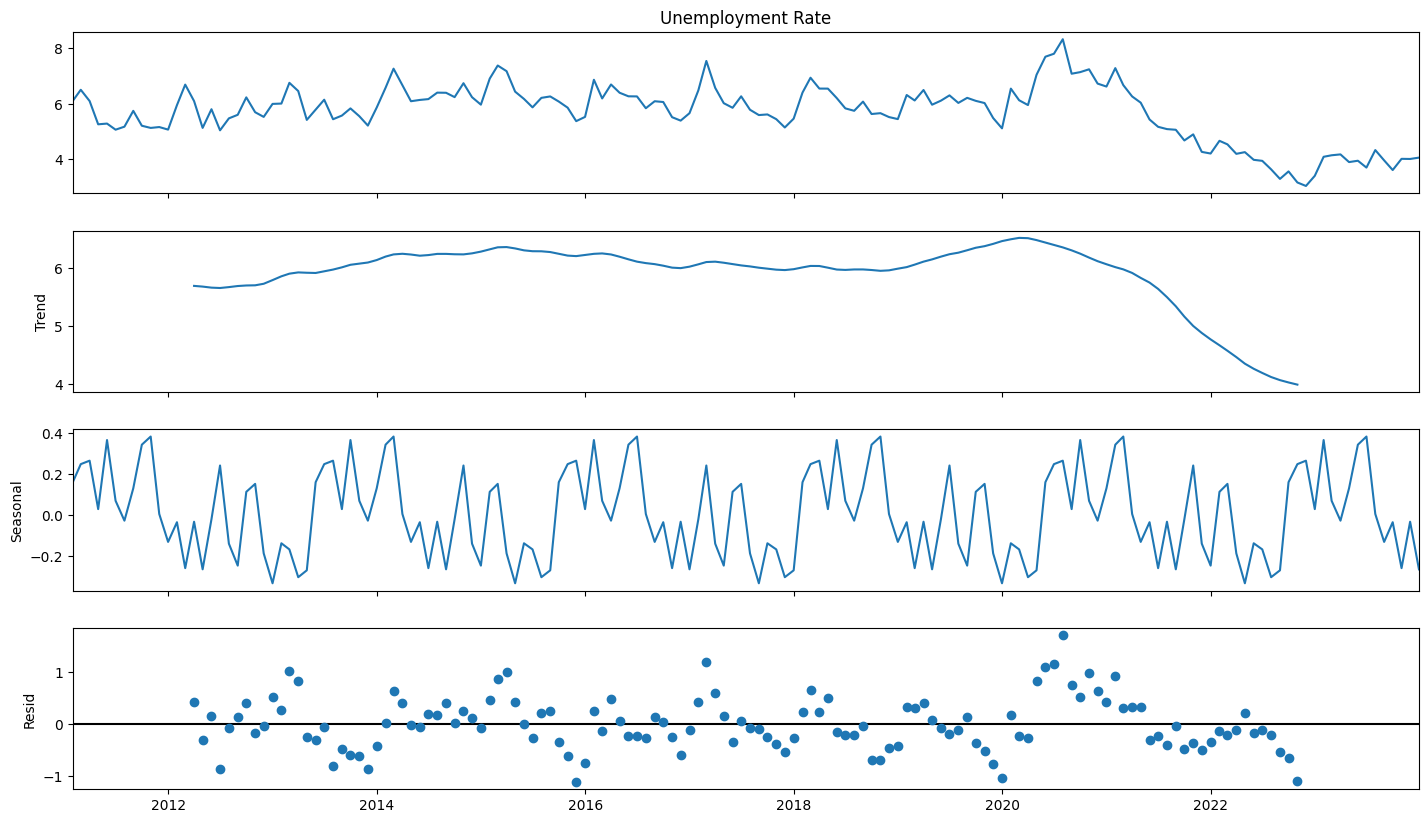

In [85]:
from statsmodels.tsa.seasonal import seasonal_decompose

str_res = seasonal_decompose(monthly_combined_df1['Unemployment Rate'],period = (7*4))
fig = str_res.plot()
fig.set_size_inches((16, 9))

### b) 1. Isolate the trend

<Axes: xlabel='Date'>

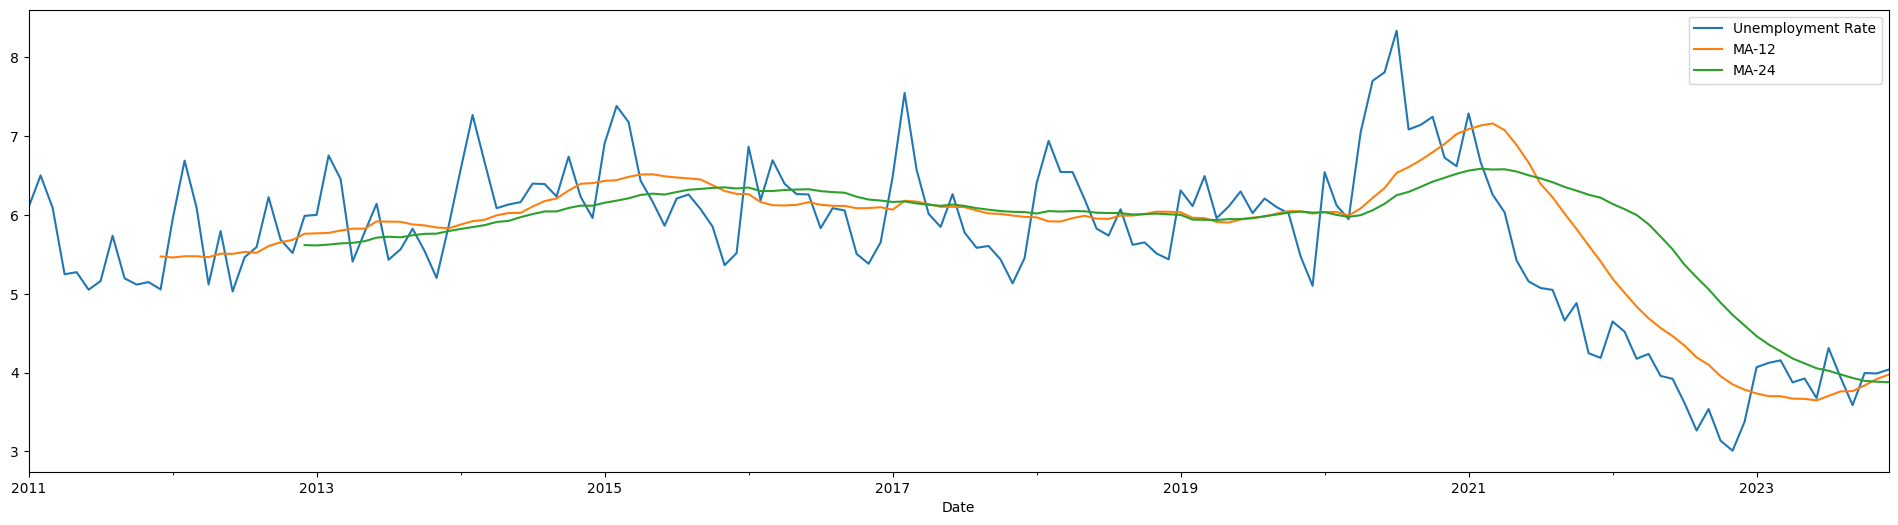

In [86]:
# There are 12 months in a year, rolling 2 per month.
monthly_combined_df1['MA-12'] = monthly_combined_df1['Unemployment Rate'].rolling(12).mean()
monthly_combined_df1['MA-24'] = monthly_combined_df1['Unemployment Rate'].rolling(24).mean() # From Prac 
monthly_combined_df1[['Unemployment Rate','MA-12','MA-24']].plot(figsize=(24, 6))

**OBSERVATION**<BR>
* MA-12 represents a 12-month (1-year) rolling moving average. It calculates the average Unemployment Rate over the past 12 months at each data point. This moving average helps smooth out short-term fluctuations and highlights longer-term trends or patterns.

* MA-24 represents a 24-month (2-year) rolling moving average. It calculates the average Unemployment Rate over the past 24 months at each data point. This moving average provides an even smoother representation of the data, further reducing noise and emphasising long-term trends.

The line plot displays three lines:

* 'Unemployment Rate': This shows the actual data for Unemployment Rate over time.<br><br>
* 'MA-12': This line represents the 12-month rolling moving average, helping visualise the short to medium-term trends.<br><br>
* 'MA-24': This line represents the 24-month rolling moving average, emphasising long-term trends.
The purpose of using moving averages is to make underlying trends more apparent by removing short-term noise or fluctuations. In the graph, it is evident how 'MA-12' and 'MA-24' provide a smoother view of the unemployment rate, making it easier to identify trends and patterns over different time scales.

### b) 2. Calculate the de-trended series

<Axes: xlabel='Date'>

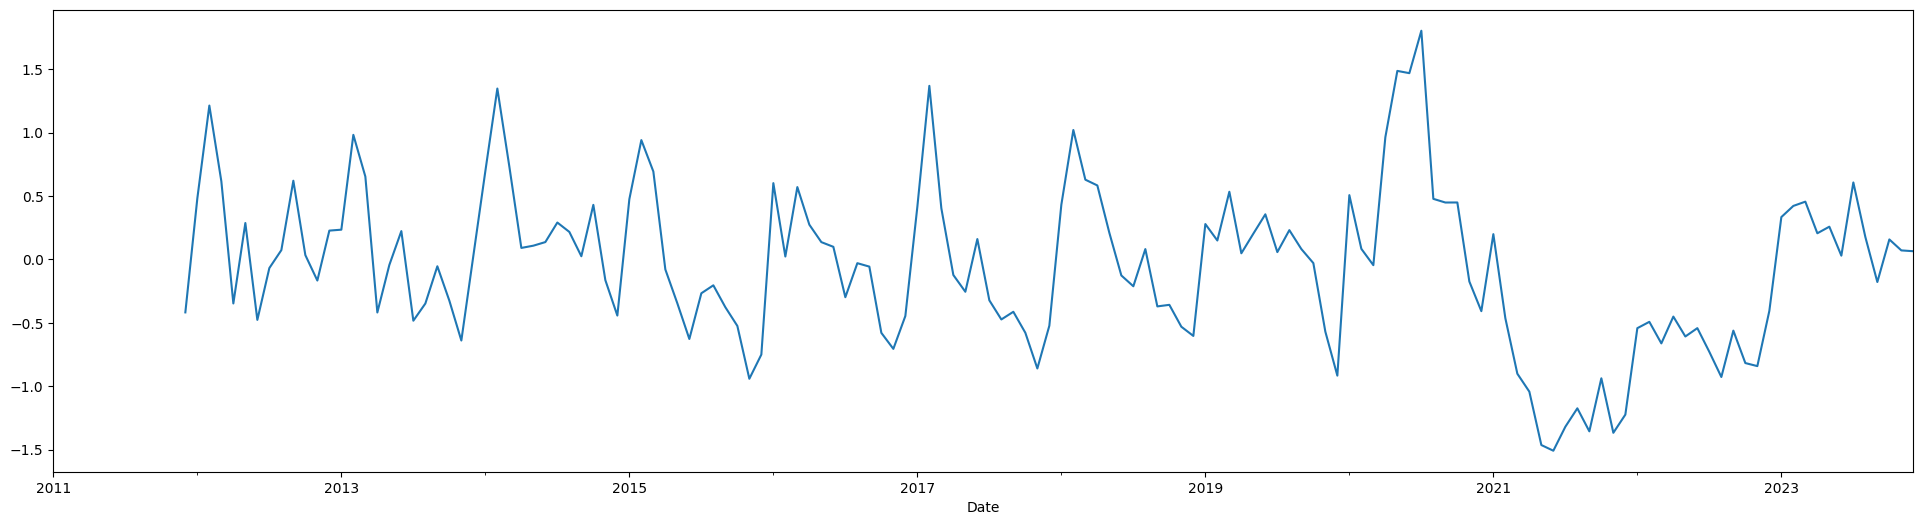

In [87]:
monthly_combined_df1['temp-detrended'] = monthly_combined_df1['Unemployment Rate'] - monthly_combined_df1['MA-12']
monthly_combined_df1['temp-detrended'].plot(figsize=(24,6))

### b) 3. Estimate the seasonal component

<Axes: xlabel='Date'>

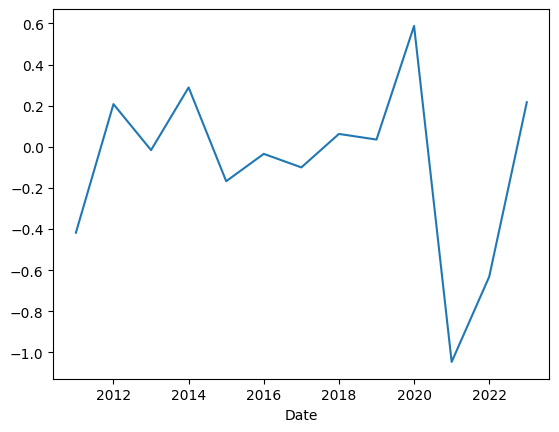

In [88]:
raw_monthly_means = monthly_combined_df1.groupby(monthly_combined_df1.index.year)['temp-detrended'].mean()
raw_monthly_means.plot()

<Axes: xlabel='Date'>

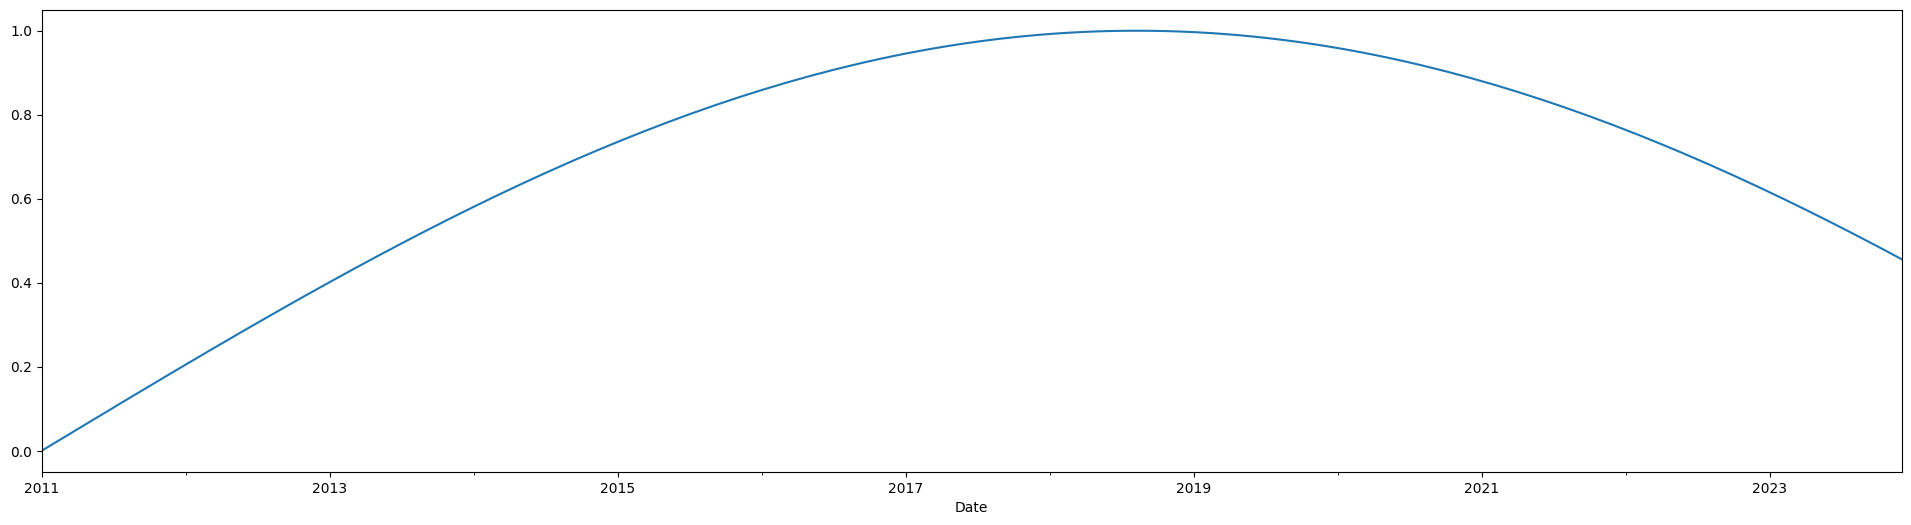

In [89]:
import numpy as np

# Define the length of the data
data_length = len(monthly_combined_df1)

# Create a seasonal pattern (e.g., a sinusoidal pattern)
# Modify this pattern as needed
annual_seasonality = 365  # Assuming annual seasonality
seasonal_pattern = np.sin(2 * np.pi * np.arange(data_length) / annual_seasonality)

# Add the seasonal pattern as a new column to combined_df
monthly_combined_df1['seasonal-pattern'] = seasonal_pattern

# Define the time range you want to visualise
start_date = '2011-01-01'
end_date = '2023-12-31'

# Plot the 'seasonal-pattern' for the specified time range
monthly_combined_df1[start_date:end_date]['seasonal-pattern'].plot(figsize=(24, 6))

### b) 4. Calculate the residual component 
The last step is to calulate the residual, by subtracting the seasonal component from the detrended data.

<Axes: xlabel='Date'>

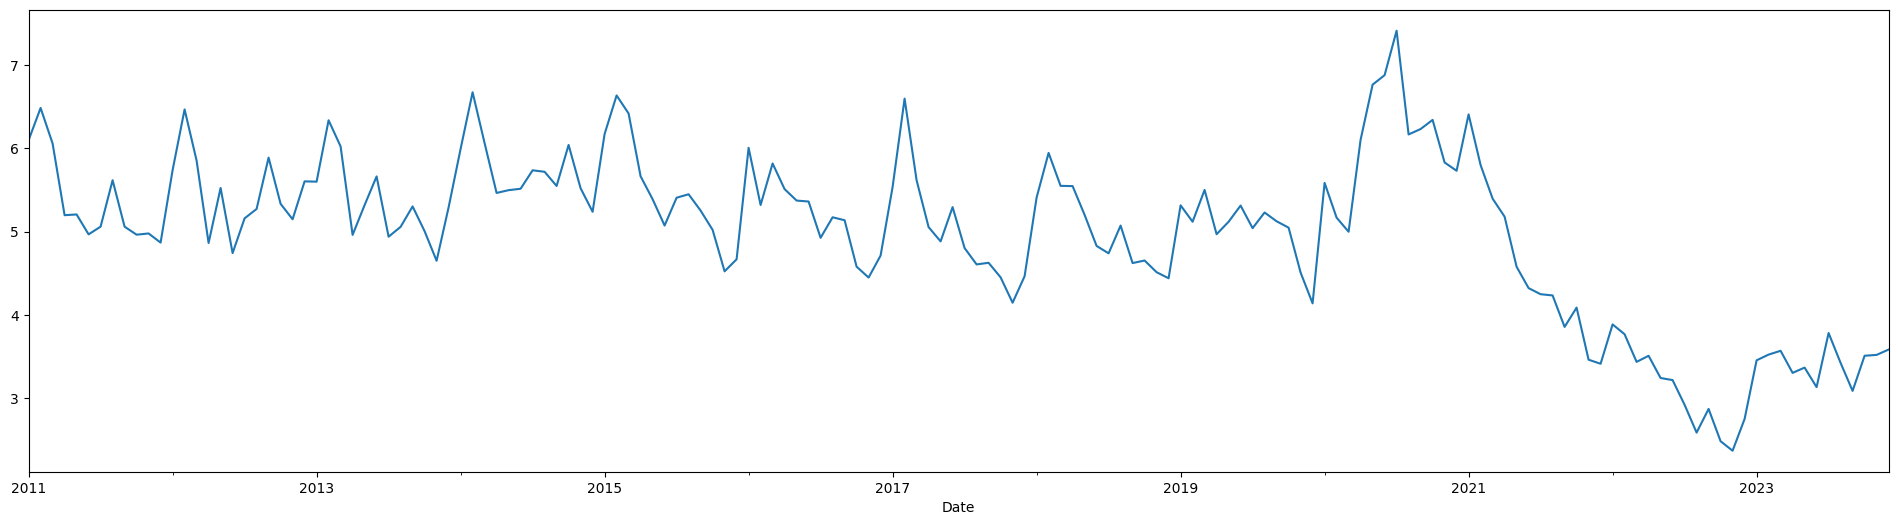

In [90]:
# Calculate the residual by subtracting the seasonal pattern from the Unemployment Rate
monthly_combined_df1['residual'] = monthly_combined_df1['Unemployment Rate'] - monthly_combined_df1['seasonal-pattern']

# Plot the residual values
monthly_combined_df1['residual'].plot(figsize=(24, 6))

### Decomposition Summary:

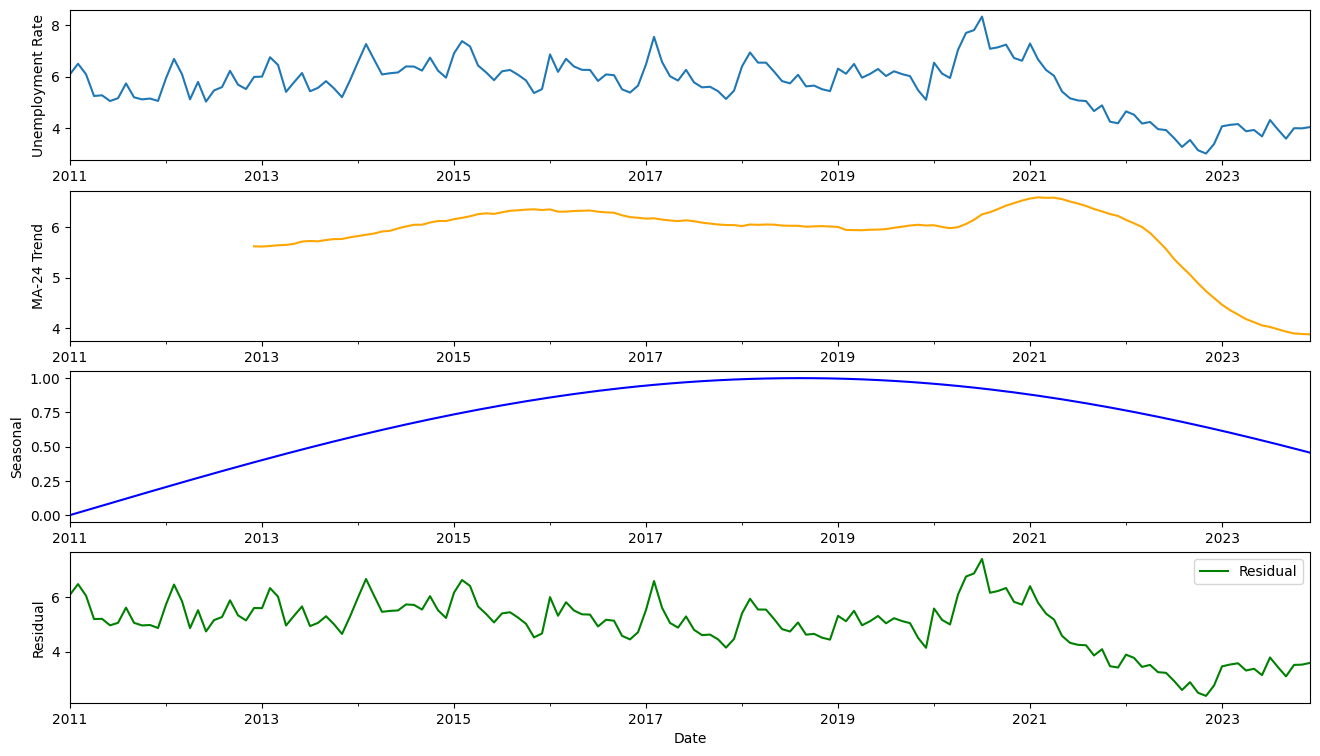

In [91]:
import matplotlib.pyplot as plt

# Create subplots
fig, ax_arr = plt.subplots(4, 1, figsize=(16, 9))

# Plot the Original data
monthly_combined_df1['Unemployment Rate'].plot(label='Original', ax=ax_arr[0])

# Plot the MA-24 Trend
monthly_combined_df1['MA-24'].plot(color='orange', label='MA-24 Trend', ax=ax_arr[1])

# Plot the Seasonal Pattern
monthly_combined_df1['seasonal-pattern'].plot(color='blue', label='Seasonal', ax=ax_arr[2])

# Plot the Residual
monthly_combined_df1['residual'].plot(color='green', label='Residual', ax=ax_arr[3])

# Set labels and legend
ax_arr[0].set_ylabel('Unemployment Rate')
ax_arr[1].set_ylabel('MA-24 Trend')
ax_arr[2].set_ylabel('Seasonal')
ax_arr[3].set_ylabel('Residual')
plt.legend()

# Show the plot
plt.show()

# Question 4
**Timeseries models: <br>
a. Fit an ARIMA model for the trend-cycle component of your STR decomposition of the training data and interpret the estimated model parameters. <br>
b. Using the STR components that you estimated in tasks 3b and 4a, produce forecasts of Queensland unemployment for the test data series. Include the uncertainty in the forecasts and visualise the predictions.**

### a) 1. Check for Stationarity

<Axes: xlabel='Date'>

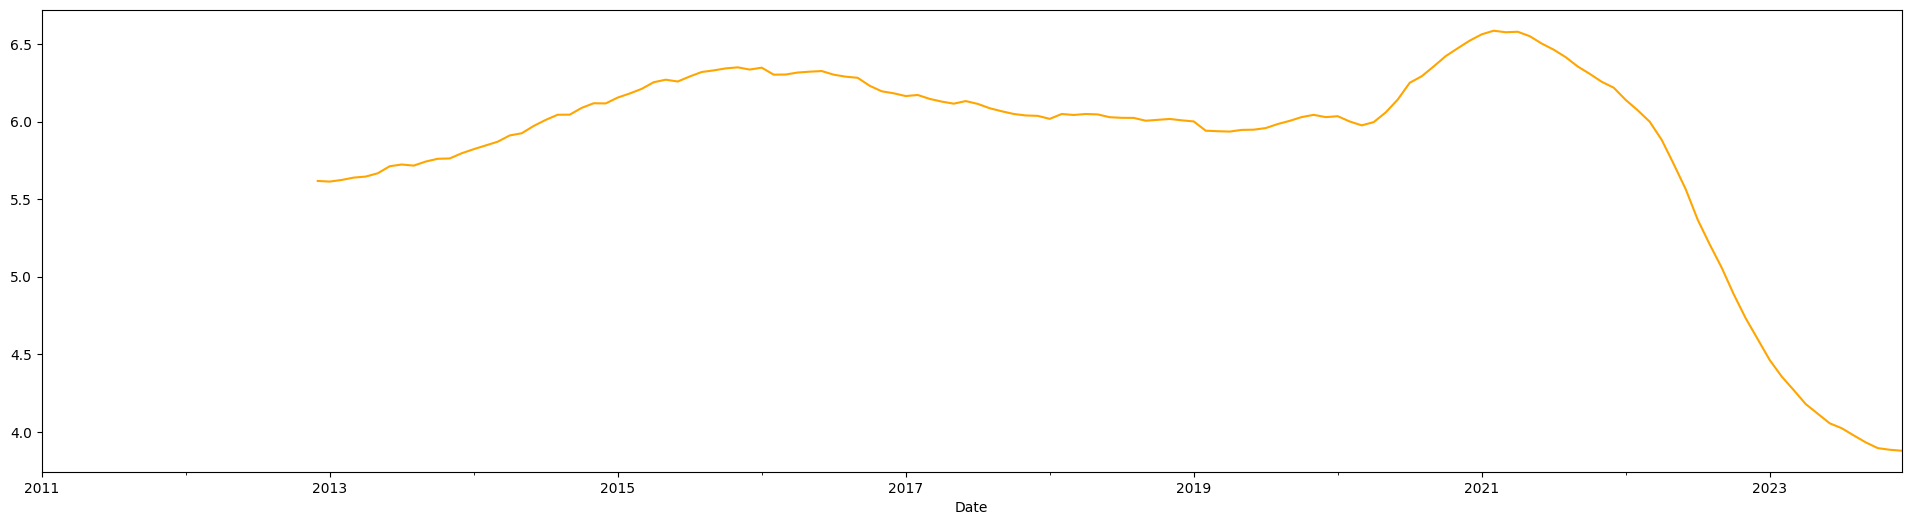

In [92]:
monthly_combined_df1['MA-24'].plot(color='orange', figsize=(24,6))

<Axes: xlabel='Date'>

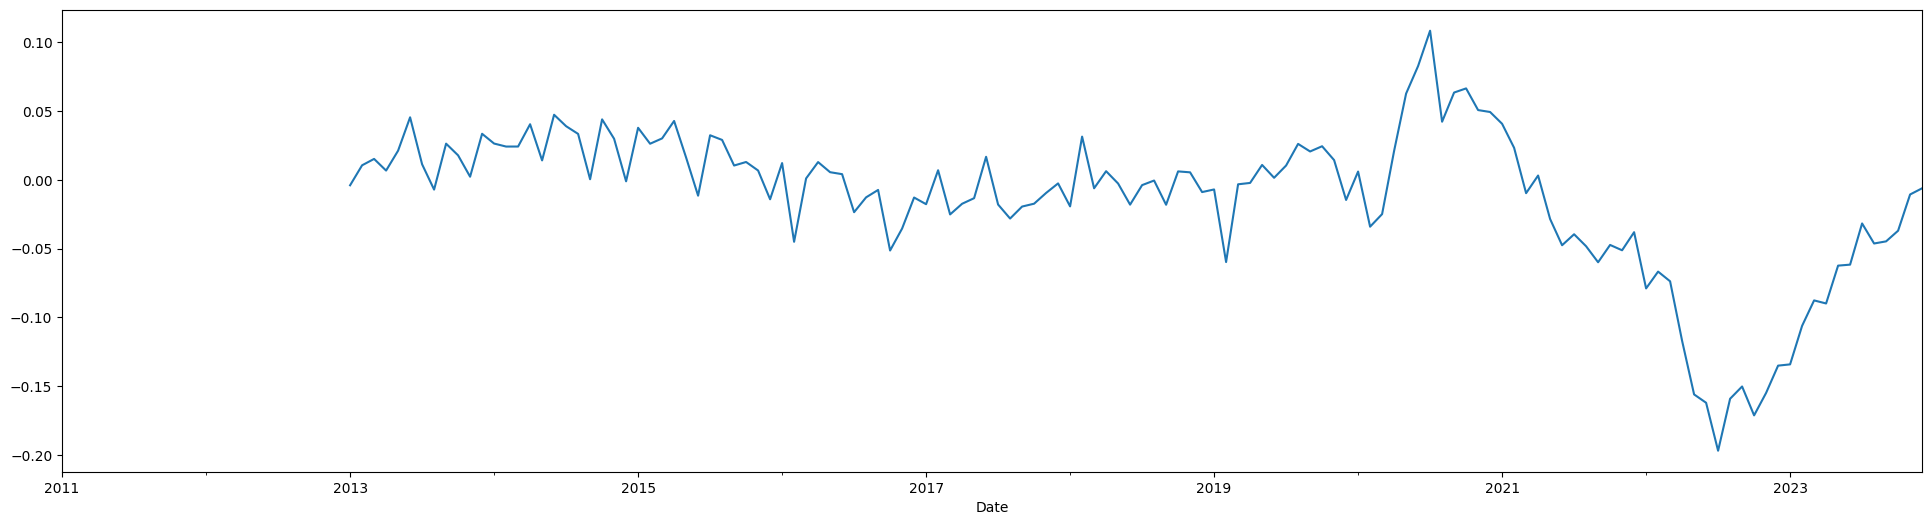

In [93]:
trend_d1 = monthly_combined_df1['MA-24'].diff()
trend_d1.plot(figsize=(24,6))

<Axes: xlabel='Date'>

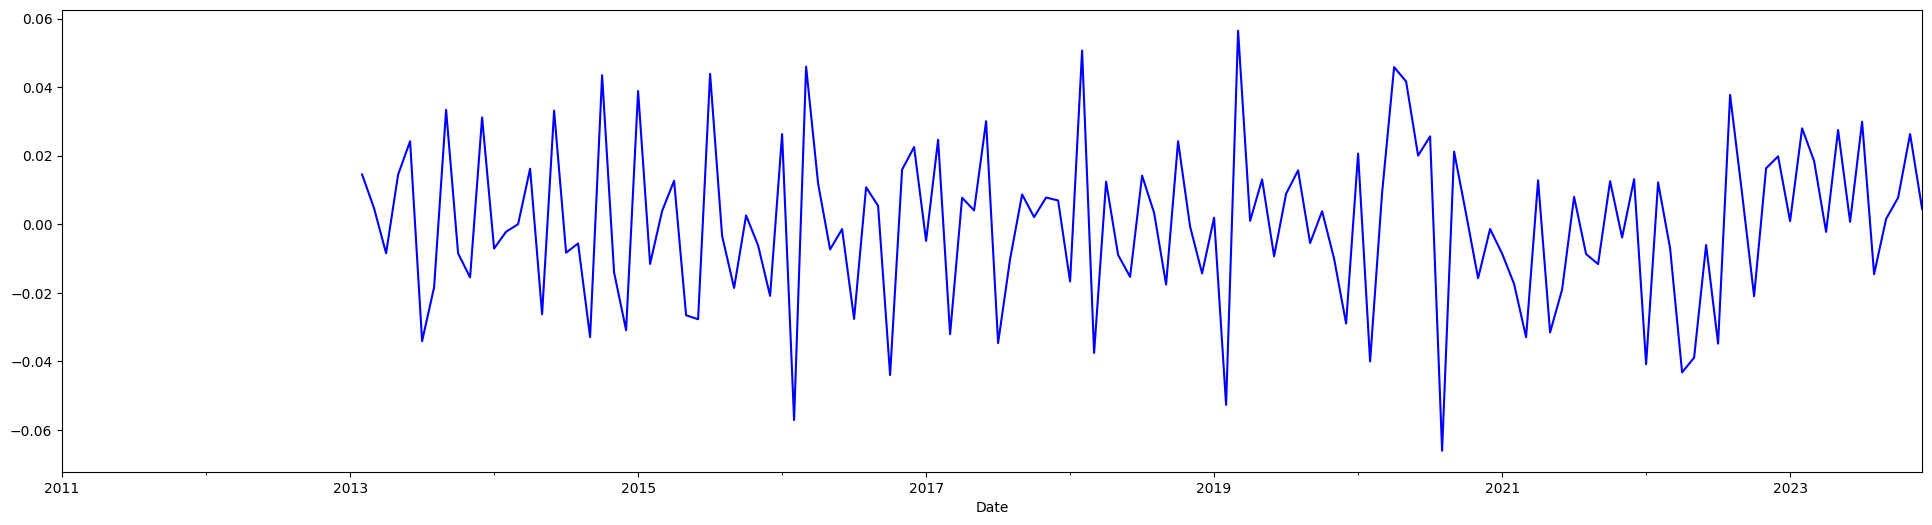

In [94]:
trend_d2 = trend_d1.diff()
trend_d2.plot(figsize=(24,6),color='blue',)

### a) 2. Fit a lower order model

In [95]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
import statsmodels.api as sm

In [96]:
arima_1_2_0 = ARIMA(monthly_combined_df1['MA-24'], order=(1, 2, 0)).fit()
print(arima_1_2_0.summary())

                               SARIMAX Results                                
Dep. Variable:                  MA-24   No. Observations:                  156
Model:                 ARIMA(1, 2, 0)   Log Likelihood                 294.317
Date:                Thu, 24 Oct 2024   AIC                           -584.633
Time:                        07:20:20   BIC                           -578.560
Sample:                    01-31-2011   HQIC                          -582.166
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2865      0.077     -3.707      0.000      -0.438      -0.135
sigma2         0.0005   6.76e-05      7.619      0.000       0.000       0.001
Ljung-Box (L1) (Q):                   0.09   Jarque-

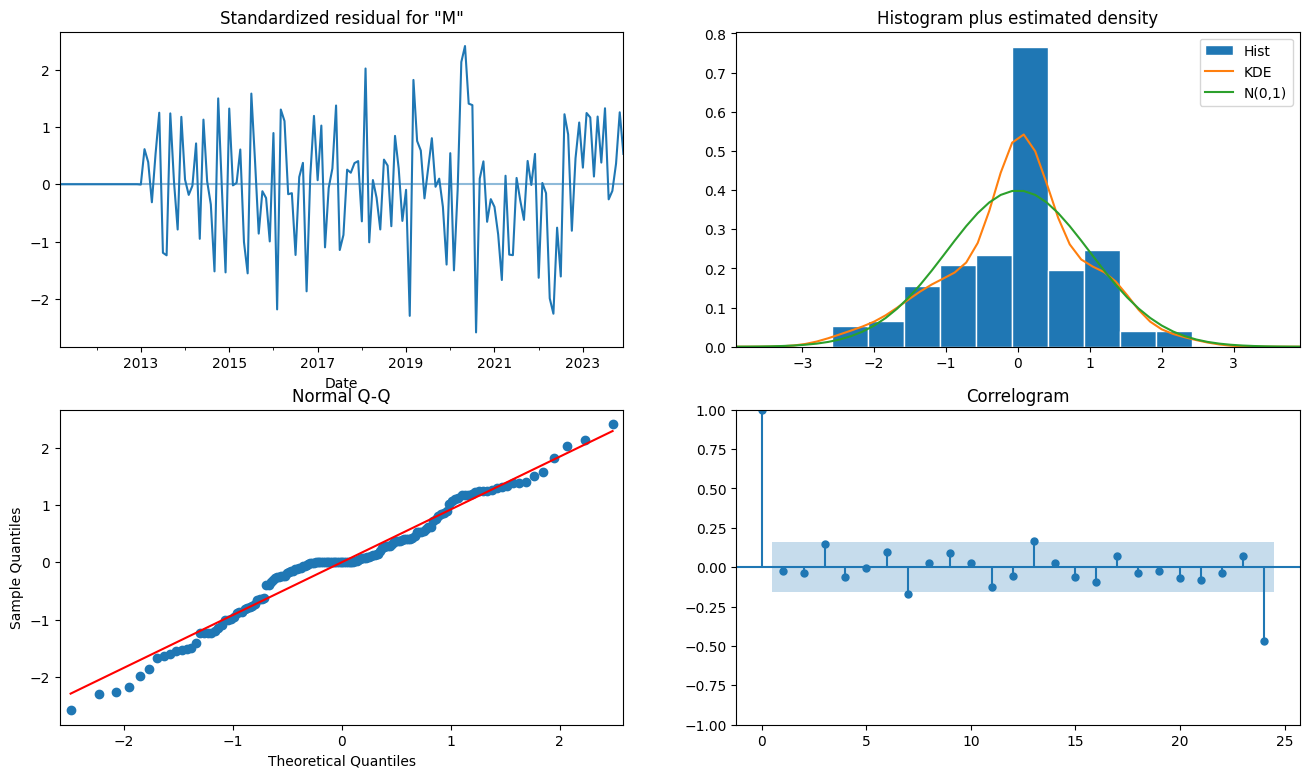

In [97]:
fig = plt.figure(figsize=(16, 9))
fig = arima_1_2_0.plot_diagnostics(fig=fig, lags=24)

### a) 3. For higher-order models

In [98]:
# Increase the AR lag parameter and re-fit:
arima_2_2_0 = ARIMA(monthly_combined_df1['MA-24'], order=(2, 2, 0)).fit()
print(arima_2_2_0.summary())

                               SARIMAX Results                                
Dep. Variable:                  MA-24   No. Observations:                  156
Model:                 ARIMA(2, 2, 0)   Log Likelihood                 294.801
Date:                Thu, 24 Oct 2024   AIC                           -583.602
Time:                        07:20:20   BIC                           -574.491
Sample:                    01-31-2011   HQIC                          -579.901
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3134      0.077     -4.073      0.000      -0.464      -0.163
ar.L2         -0.0869      0.090     -0.963      0.336      -0.264       0.090
sigma2         0.0005   6.66e-05      7.675      0.0

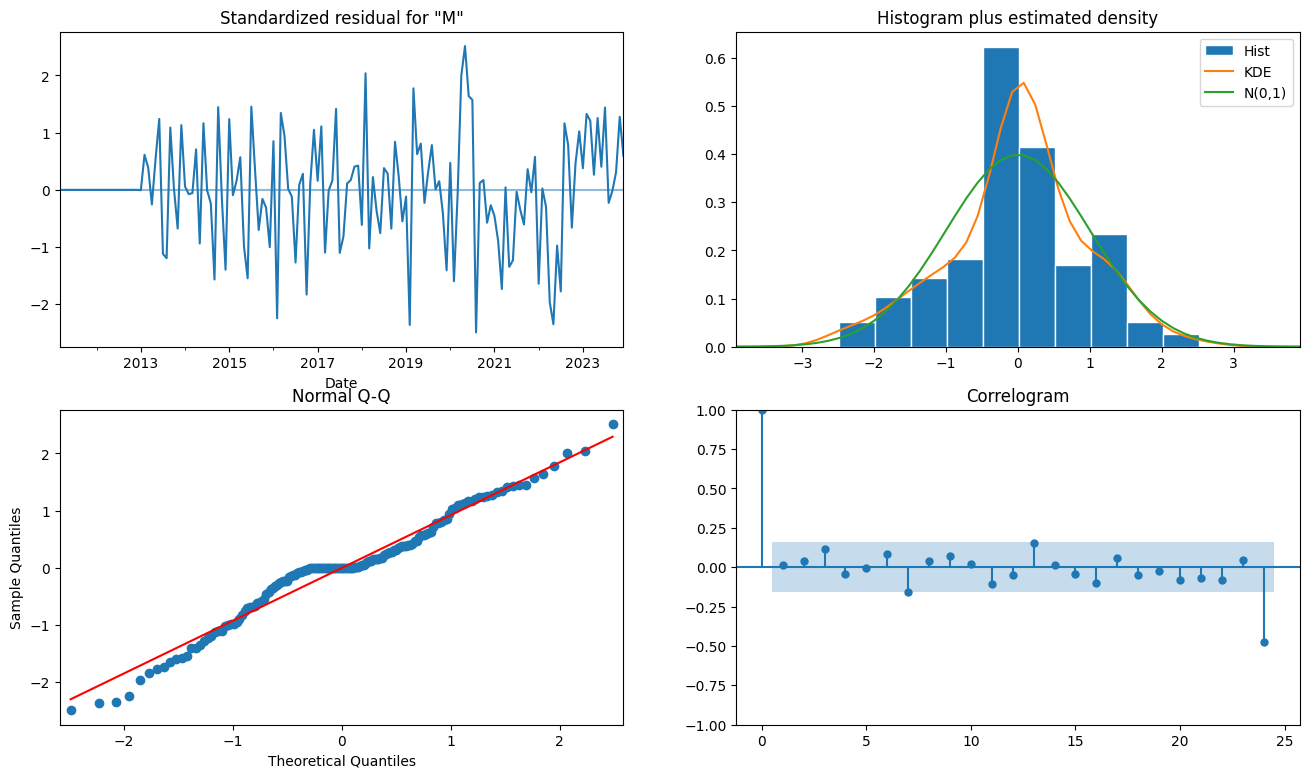

In [99]:
fig = plt.figure(figsize=(16, 9))
fig = arima_2_2_0.plot_diagnostics(fig=fig, lags=24)

### a) 4. Compare the goodness of fit, then continue

In [100]:
# At the next iteration, try increasing the MA term to q=1:
arima_2_2_1 = ARIMA(monthly_combined_df1['MA-24'], order=(2, 2, 1)).fit()
print(arima_2_2_1.summary())

                               SARIMAX Results                                
Dep. Variable:                  MA-24   No. Observations:                  156
Model:                 ARIMA(2, 2, 1)   Log Likelihood                 294.575
Date:                Thu, 24 Oct 2024   AIC                           -581.150
Time:                        07:20:21   BIC                           -569.002
Sample:                    01-31-2011   HQIC                          -576.216
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1499      1.705     -0.088      0.930      -3.492       3.192
ar.L2         -0.0040      0.526     -0.008      0.994      -1.034       1.026
ma.L1         -0.1490      1.695     -0.088      0.9

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


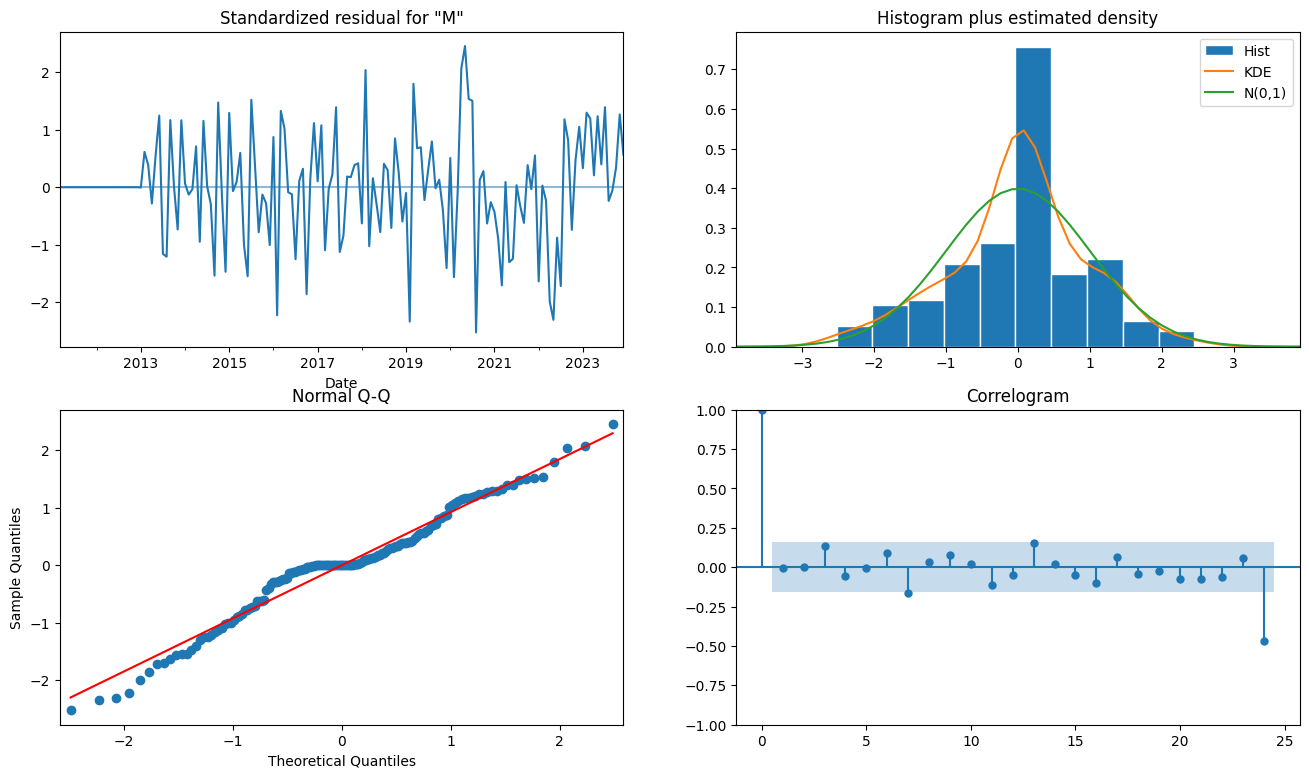

In [101]:
fig = plt.figure(figsize=(16, 9))
fig = arima_2_2_1.plot_diagnostics(fig=fig, lags=24)

### b) Forecasting with ARIMA

In [102]:
# The get_forecast(steps) method is ussed to generate forecast information in a neatly wrapped object. 

# Keep the predictions orgainsied in a dedicated dataframe, beginning with the mean trend prediction:
arima_fcst = arima_2_2_1.get_forecast(steps=24)
arima_predictions = pd.DataFrame(arima_fcst.predicted_mean)
arima_predictions.rename(columns={"predicted_mean": "trend"}, inplace=True)

### b) 1. Mean trend prediction

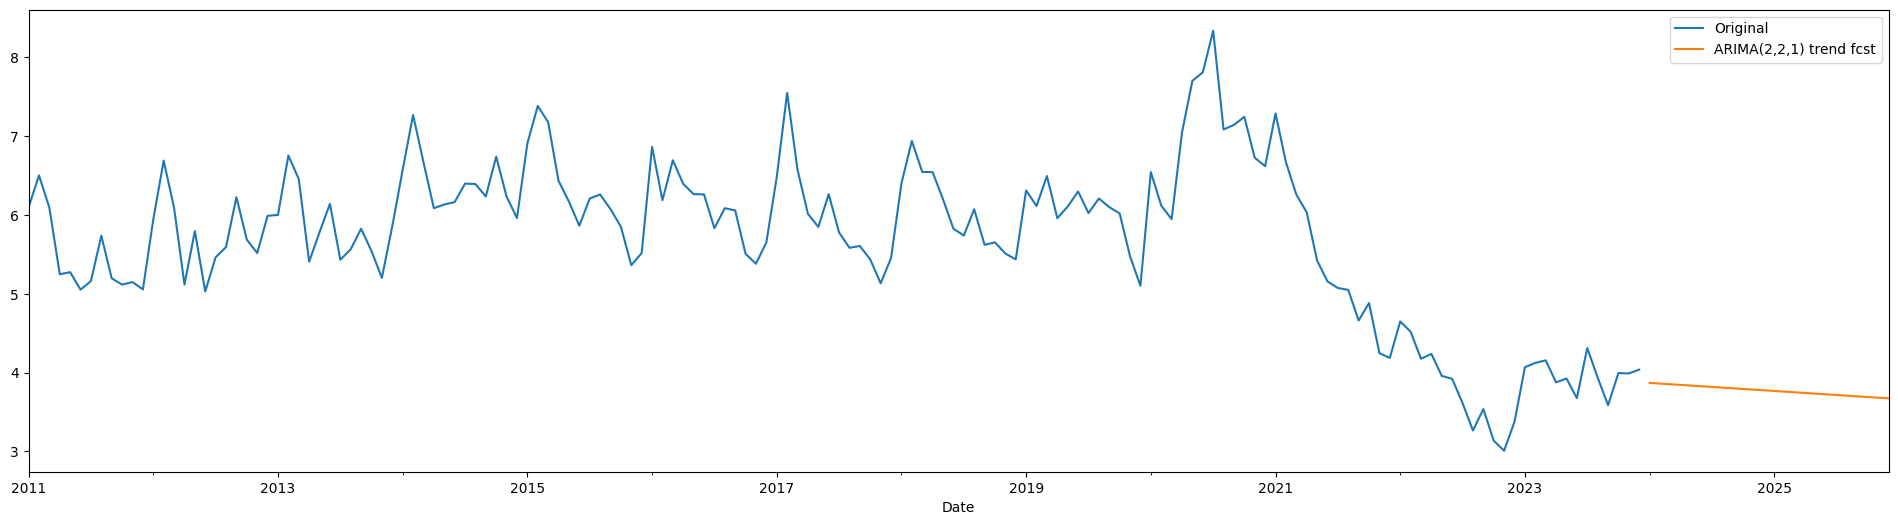

In [103]:
# Plot the mean prediction
fig, ax_arima_fcst = plt.subplots(figsize=(24,6))
monthly_combined_df1['2011-01-01':'2023-12-31']['Unemployment Rate'].plot(label='Original', ax=ax_arima_fcst)
arima_predictions['trend'].plot(label="ARIMA(2,2,1) trend fcst", ax=ax_arima_fcst)
plt.legend()

### b) 2. Adding the seasonality back into forecasts

In [104]:
# Assuming the calculation of the seasonal component as seasonal_pattern
monthly_combined_df1['seasonal'] = seasonal_pattern.tolist()

monthly_combined_df1

,Interest Rate,Unemployment Rate,Inflation Rate,MA-12,MA-24,temp-detrended,seasonal-pattern,residual,seasonal
Date,,,,,,,,,
2011-01-31,4.75,6.096681,98.3,NaN,NaN,NaN,0.000000,6.096681,0.000000
2011-02-28,4.75,6.500871,98.3,NaN,NaN,NaN,0.017213,6.483657,0.017213
2011-03-31,4.75,6.091718,98.3,NaN,NaN,NaN,0.034422,6.057297,0.034422
2011-04-30,4.75,5.247593,98.3,NaN,NaN,NaN,0.051620,5.195973,0.051620
2011-05-31,4.75,5.273783,98.3,NaN,NaN,NaN,0.068802,5.204981,0.068802
...,...,...,...,...,...,...,...,...,...
2023-08-31,4.10,3.938162,133.7,3.761556,3.977281,0.176606,0.516062,3.422099,0.516062
2023-09-30,4.10,3.587391,135.3,3.765681,3.932543,-0.178290,0.501242,3.086149,0.501242
2023-10-31,4.10,3.994383,135.3,3.837146,3.895543,0.157238,0.486273,3.508111,0.486273


# Question 5
**Pure forecasters: now consider your choice of neural network-based methods: <br>
a. Select an appropriate pure forecasting method to predict the trend component of the unemployment training data. <br>
b. Using the seasonal component that you estimated in task 3b and the pure forecaster from 5a, produce forecasts of Queensland unemployment for the test data series. Include the uncertainty in the forecasts and visualise the predictions.**

In [105]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Extract the actual Unemployment Rate and predicted trend component
monthly_combined_df1_cleaned = monthly_combined_df1.dropna(subset=['Unemployment Rate', 'temp-detrended'])
actual_unemployment_rate = monthly_combined_df1_cleaned['Unemployment Rate']
predicted_trend = monthly_combined_df1_cleaned['temp-detrended']

# Calculate MAE and RMSE
mae = mean_absolute_error(actual_unemployment_rate, predicted_trend)
rmse = np.sqrt(mean_squared_error(actual_unemployment_rate, predicted_trend))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 5.76
Root Mean Square Error (RMSE): 5.82


**OBSERVATION**<br>
* Mean Absolute Error (MAE): MAE measures the average absolute difference between the actual values and the predicted values. In this case, the MAE is approximately 5.76. This means that, on average, the model's predictions deviate from the actual values by around 5.76 units.

* Root Mean Square Error (RMSE): RMSE is a slightly more complex metric. It first calculates the squared differences between actual and predicted values, then takes the square root of the average of those squared differences. In this case, the RMSE is approximately 5.82. Like MAE, RMSE provides a measure of the model's prediction error, but it gives more weight to larger errors. It's in the same units as the predicted values.

In summary, the forecasting model has an MAE of 5.76, which means that, on average, the absolute difference between predictions and the actual values is about 5.76 units. The RMSE of 5.82 accounts for both the magnitude and the square of errors, and it can be used to assess the goodness of fit of the model. A lower RMSE indicates a better fit, similar to MAE.

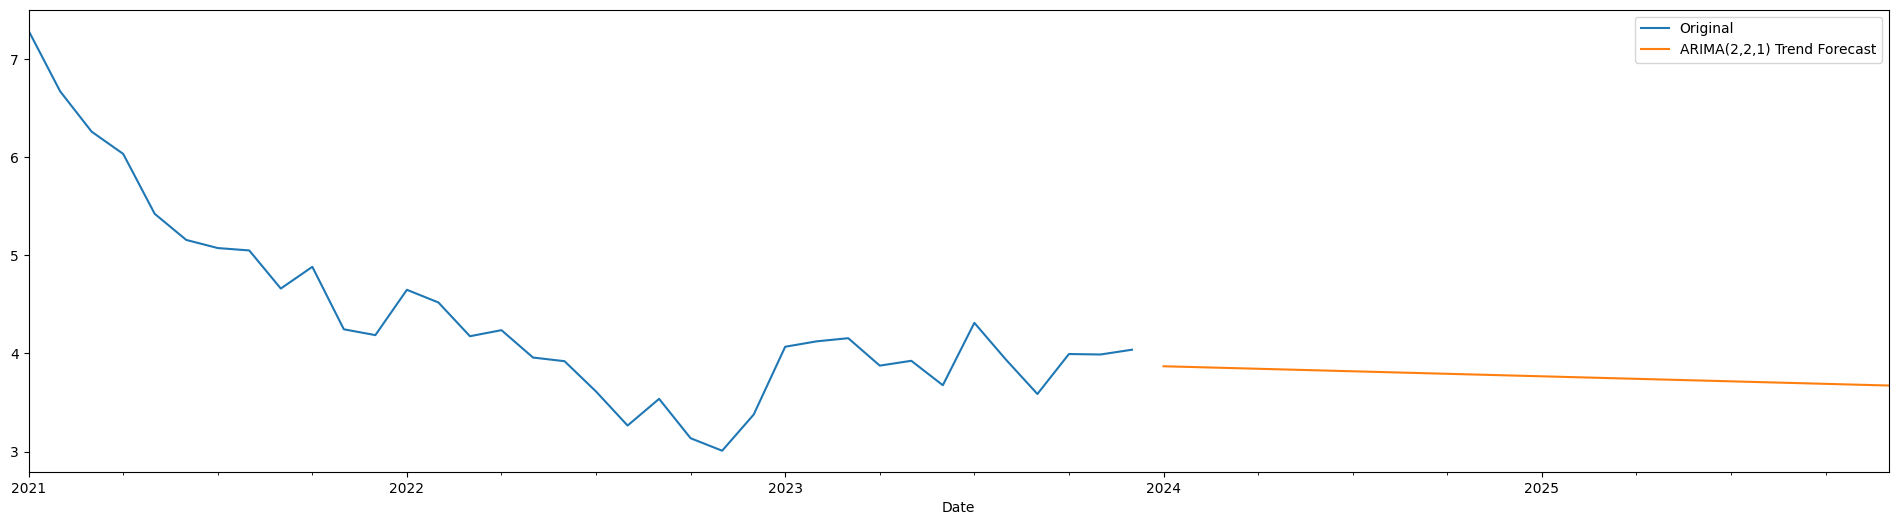

In [107]:
fig, ax_arima_fcst_test = plt.subplots(figsize=(24, 6))
testing_data['Unemployment Rate'].plot(label='Original', ax=ax_arima_fcst_test)
arima_predictions['trend'].plot(label="ARIMA(2,2,1) Trend Forecast", ax=ax_arima_fcst_test)
plt.legend()
plt.show()

# Question 6
**Using side data: how might different interest rate projections affect the forecasts? <br>
a. Specifically, generate a series of values corresponding to a hypothetical reduction of interest rates by 0.5% for the next six months beyond the end of the test data, and a second series of values corresponding to interest rates remaining at their current level for the same duration. <br>
b. Use each projection of the side information to generate two forecasts of the unemployment timeseries for six months beyond the end of the test data. Use any model that you wish, e.g. ARIMAX or neural network. Visualise the two forecasts, including uncertainties in them, and discuss the difference between the two timeseries predictions.**

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

# Load your timeseries data (ensure to adjust the file path and column names)
# Replace 'your_data.csv' with your actual file
unemployment_rate = monthly_combined_df1['Unemployment Rate']  # Replace with your actual column name
interest_rate = monthly_combined_df1['Interest Rate']  # Replace with your actual column name

In [109]:
# Define the interest rate projections
current_interest_rate = interest_rate.iloc[-1]
months_ahead = 6

# Create interest rate projections
interest_rate_reduction = current_interest_rate - 0.5
interest_rate_current = current_interest_rate

# Create a DataFrame to hold the interest rate projections
interest_rate_projection_reduction = pd.Series([interest_rate_reduction] * months_ahead, 
                                                index=pd.date_range(start=unemployment_rate.index[-1] + pd.DateOffset(1), 
                                                                    periods=months_ahead, freq='M'))

interest_rate_projection_current = pd.Series([interest_rate_current] * months_ahead, 
                                              index=pd.date_range(start=unemployment_rate.index[-1] + pd.DateOffset(1), 
                                                                  periods=months_ahead, freq='M'))

# Display projections
interest_rate_projection_reduction, interest_rate_projection_current

/tmp/ipykernel_802858/3686991957.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index=pd.date_range(start=unemployment_rate.index[-1] + pd.DateOffset(1),
/tmp/ipykernel_802858/3686991957.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index=pd.date_range(start=unemployment_rate.index[-1] + pd.DateOffset(1),


(2024-01-31    3.85
 2024-02-29    3.85
 2024-03-31    3.85
 2024-04-30    3.85
 2024-05-31    3.85
 2024-06-30    3.85
 Freq: ME, dtype: float64,
 2024-01-31    4.35
 2024-02-29    4.35
 2024-03-31    4.35
 2024-04-30    4.35
 2024-05-31    4.35
 2024-06-30    4.35
 Freq: ME, dtype: float64)

In [110]:
# Combine the original unemployment data with the new projections
combined_data_reduction = pd.concat([unemployment_rate, interest_rate_projection_reduction])
combined_data_current = pd.concat([unemployment_rate, interest_rate_projection_current])

# Display combined data
combined_data_reduction, combined_data_current

(2011-01-31    6.096681
 2011-02-28    6.500871
 2011-03-31    6.091718
 2011-04-30    5.247593
 2011-05-31    5.273783
                 ...   
 2024-02-29    3.850000
 2024-03-31    3.850000
 2024-04-30    3.850000
 2024-05-31    3.850000
 2024-06-30    3.850000
 Freq: ME, Length: 162, dtype: float64,
 2011-01-31    6.096681
 2011-02-28    6.500871
 2011-03-31    6.091718
 2011-04-30    5.247593
 2011-05-31    5.273783
                 ...   
 2024-02-29    4.350000
 2024-03-31    4.350000
 2024-04-30    4.350000
 2024-05-31    4.350000
 2024-06-30    4.350000
 Freq: ME, Length: 162, dtype: float64)

In [111]:
# Forecasting using ARIMAX
def forecast_with_arimax(endog, exog, forecast_periods):
    # Ensure exog and endog have the same length for historical data
    model = SARIMAX(endog=endog, exog=exog[:len(endog)], order=(2, 2, 1))  # Adjust order as necessary
    fitted_model = model.fit(disp=False)
    
    # Forecast for the given periods using the exogenous projections
    future_exog = exog[len(endog):]  # Exogenous data for future periods
    forecast = fitted_model.get_forecast(steps=forecast_periods, exog=future_exog)
    
    # Generate forecast index and values
    forecast_index = pd.date_range(start=endog.index[-1] + pd.DateOffset(1), 
                                   periods=forecast_periods, freq='M')
    forecast_values = forecast.predicted_mean
    forecast_conf_int = forecast.conf_int()
    return forecast_values, forecast_conf_int, fitted_model

In [112]:
# Create exogenous variable series
exogenous_reduction = np.concatenate([interest_rate.values, interest_rate_projection_reduction.values[:months_ahead]])
exogenous_current = np.concatenate([interest_rate.values, interest_rate_projection_current.values[:months_ahead]])

In [113]:
# Forecasting
forecast_values_reduction, conf_int_reduction, model_reduction = forecast_with_arimax(unemployment_rate, exogenous_reduction, months_ahead)
forecast_values_current, conf_int_current, model_current = forecast_with_arimax(unemployment_rate, exogenous_current, months_ahead)

/tmp/ipykernel_802858/2381558161.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=endog.index[-1] + pd.DateOffset(1),
/tmp/ipykernel_802858/2381558161.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=endog.index[-1] + pd.DateOffset(1),


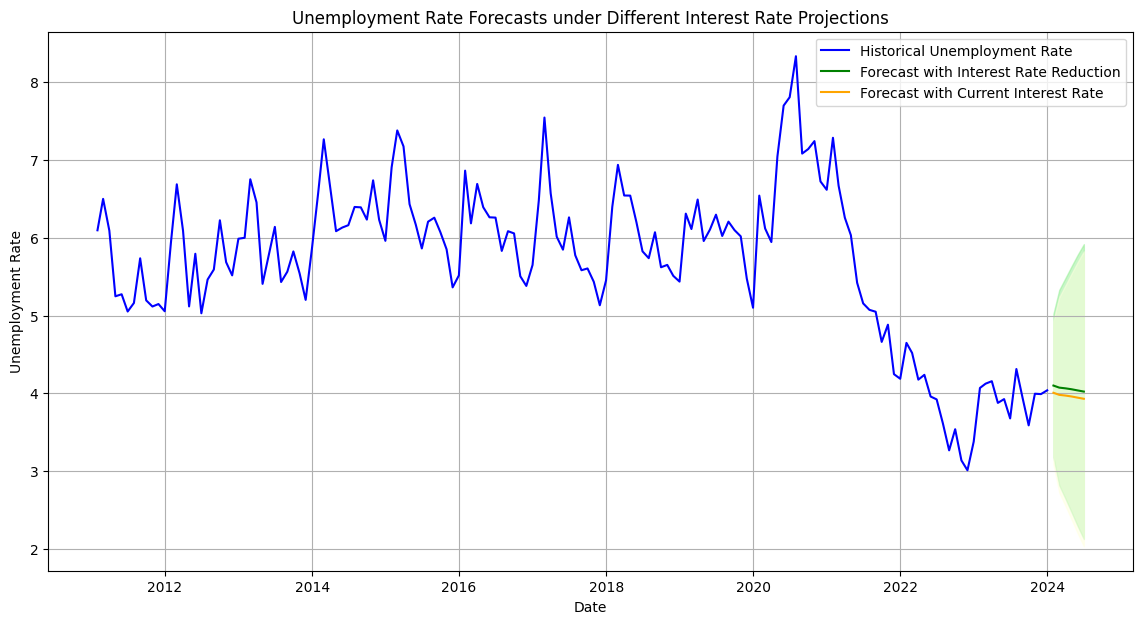

In [114]:
# Visualise the Forecasts
plt.figure(figsize=(14, 7))
plt.plot(unemployment_rate, label='Historical Unemployment Rate', color='blue')
plt.plot(forecast_values_reduction.index, forecast_values_reduction, label='Forecast with Interest Rate Reduction', color='green')
plt.fill_between(forecast_values_reduction.index, conf_int_reduction.iloc[:, 0], conf_int_reduction.iloc[:, 1], color='lightgreen', alpha=0.5)
plt.plot(forecast_values_current.index, forecast_values_current, label='Forecast with Current Interest Rate', color='orange')
plt.fill_between(forecast_values_current.index, conf_int_current.iloc[:, 0], conf_int_current.iloc[:, 1], color='lightyellow', alpha=0.5)

plt.title('Unemployment Rate Forecasts under Different Interest Rate Projections')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.grid()
plt.show()

**ANSWER**<br>
There are three plots that will be referenced in this analysis: the two ARIMA (2, 2, 1) model from Question 4 and Question 5, as compared to the Interest Rate Projections graph produced in Question 6. The key difference between ARIMA and interest rate projections is that ARIMA is based on historically statistics, while interest rate projections follows a much more flexible approach occasionally used principles of economics to forecast trends. It is evident that regardless of model, all three predict is downward trend for unemployment, despite the preceding data point on the last day of 2023 indicating otherwise (the trend was clearly upward turning in the last few months of 2023). Further, while unemployment has been historically cyclic, it has not seemed to be the case as rigidly especially in the last 3-4 years since early 2020. The cyclic, seasonal nature of unemployment has been severly altered despite there being attempts for the data to replicate this cyclic movement in 2021, 2022, 2023.

There is a sense of consistency amongst all three models, whether flexible or not given that they are project that the unemployment rate will decrease in the future.